In [145]:
import pandas as pd
import numpy as np
import seaborn as sns

In [146]:

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [147]:
df = pd.read_csv('train.csv')


In [148]:
# shape and data types of the data
print("Data shape",df.shape)



Data shape (1460, 81)


In [149]:
print("Data variables types",df.dtypes)

Data variables types Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [150]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal' 'MoSold' 'YrSold'
 'SalePrice']


In [151]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['MSZoning' 'Street' 'Alley' 'LotShape' 'LandContour' 'Utilities'
 'LotConfig' 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2'
 'BldgType' 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st'
 'Exterior2nd' 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2'
 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' 'KitchenQual'
 'Functional' 'FireplaceQu' 'GarageType' 'GarageFinish' 'GarageQual'
 'GarageCond' 'PavedDrive' 'PoolQC' 'Fence' 'MiscFeature' 'SaleType'
 'SaleCondition']


- Checking for missing values

created missing indicator for: LotFrontage
created missing indicator for: Alley
created missing indicator for: MasVnrType
created missing indicator for: MasVnrArea
created missing indicator for: BsmtQual
created missing indicator for: BsmtCond
created missing indicator for: BsmtExposure
created missing indicator for: BsmtFinType1
created missing indicator for: BsmtFinType2
created missing indicator for: Electrical
created missing indicator for: FireplaceQu
created missing indicator for: GarageType
created missing indicator for: GarageYrBlt
created missing indicator for: GarageFinish
created missing indicator for: GarageQual
created missing indicator for: GarageCond
created missing indicator for: PoolQC
created missing indicator for: Fence
created missing indicator for: MiscFeature


<AxesSubplot:xlabel='index'>

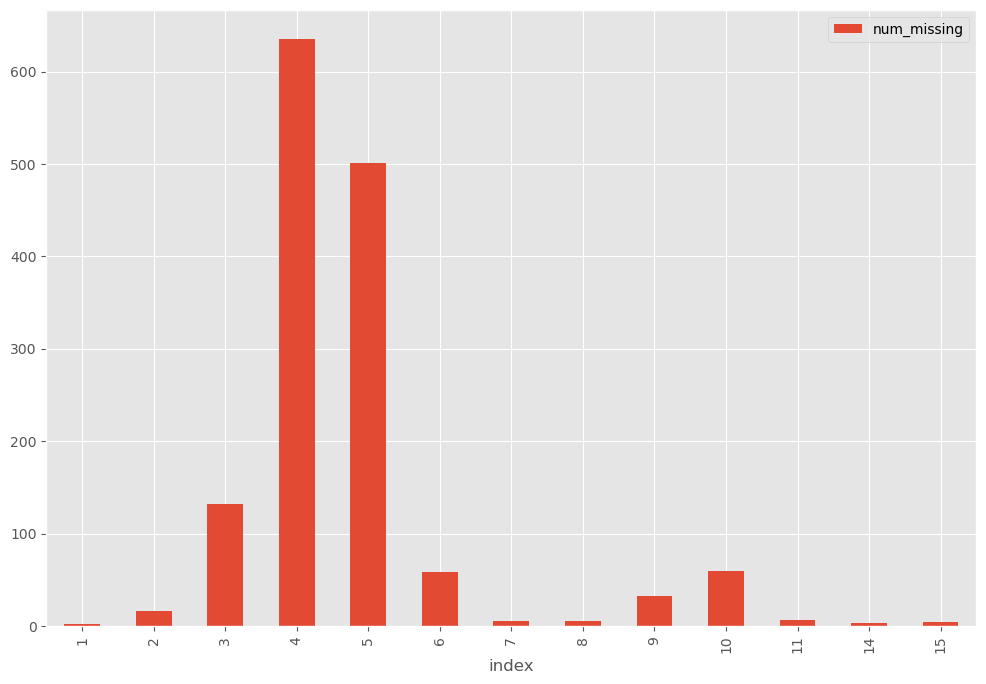

In [152]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

- From the histogram above, it is shown that there is NO observations **without** missing values
- Also, value of index **4** has the most missing values

In [153]:
# a function that calculates the percentage of missing values in numeric varibales that has missing values

df_missing_numeric = df_numeric.copy()
for col in df_missing_numeric.columns:
    pct_missing = np.mean(df_missing_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Id - 0%
MSSubClass - 0%
LotFrontage - 18%
LotArea - 0%
OverallQual - 0%
OverallCond - 0%
YearBuilt - 0%
YearRemodAdd - 0%
MasVnrArea - 1%
BsmtFinSF1 - 0%
BsmtFinSF2 - 0%
BsmtUnfSF - 0%
TotalBsmtSF - 0%
1stFlrSF - 0%
2ndFlrSF - 0%
LowQualFinSF - 0%
GrLivArea - 0%
BsmtFullBath - 0%
BsmtHalfBath - 0%
FullBath - 0%
HalfBath - 0%
BedroomAbvGr - 0%
KitchenAbvGr - 0%
TotRmsAbvGrd - 0%
Fireplaces - 0%
GarageYrBlt - 6%
GarageCars - 0%
GarageArea - 0%
WoodDeckSF - 0%
OpenPorchSF - 0%
EnclosedPorch - 0%
3SsnPorch - 0%
ScreenPorch - 0%
PoolArea - 0%
MiscVal - 0%
MoSold - 0%
YrSold - 0%
SalePrice - 0%


<AxesSubplot:>

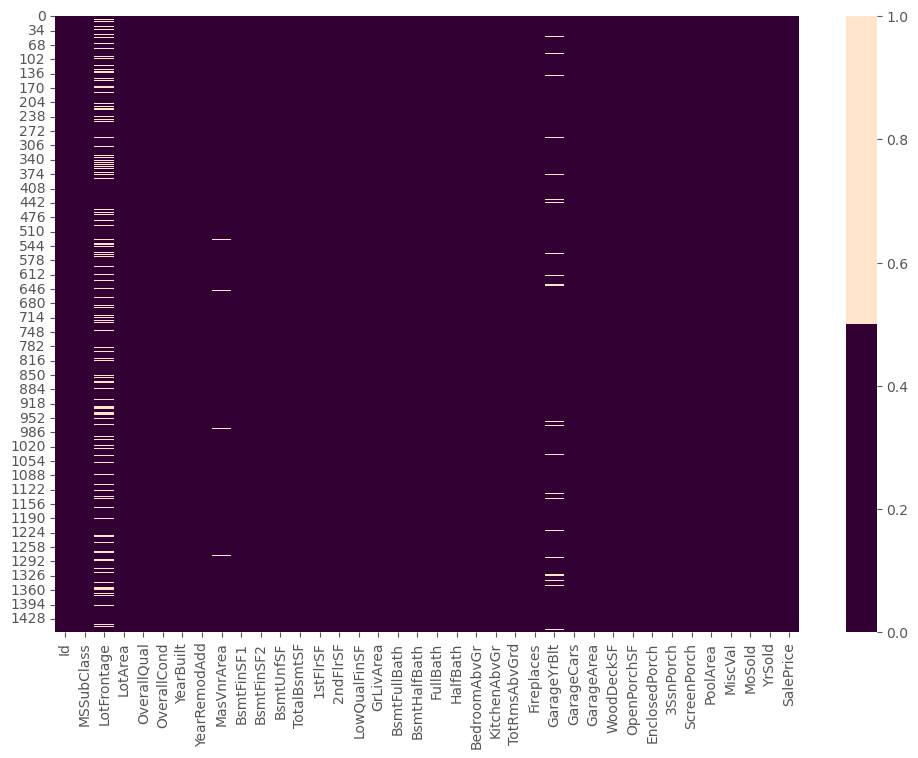

In [154]:
cols = df_numeric.columns[:39] # first 30 columns
colours = ['#330033', '#FFE5CC'] # specify the colours - beige is missing.  purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

- Change 'NA to 'none'

In [155]:
df_numeric['GarageYrBlt'] = df_numeric['GarageYrBlt'].fillna("None")

-  variables **LotFrontage** & **MasVnrArea**  have missing values

From the heatmap of numerical columns, it is noticed that, variables:

 - **LotFrontage**:' Linear feet of street connected to property' | has **18%** of missing values

 - **GarageYrBlt**: 'Year garage was built' |  has **6%** of missing values because 'GarageType was NA'

 - **MasVnrArea**: 'Masonry veneer area in square feet' | has **1%** of missing values, because of the low percentage we could consider to fill the missing values


<AxesSubplot:>

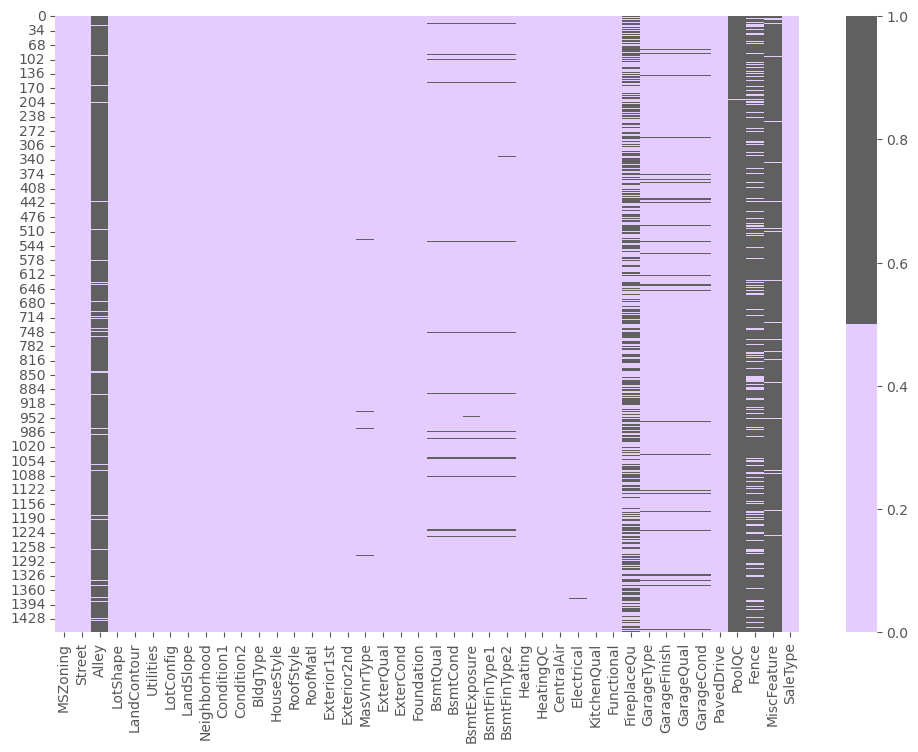

In [156]:
cols = df_non_numeric.columns[:42] # first 30 columns
colours = ['#E5CCFF', '#606060'] # specify the colours - grey is missing. purple is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

From the heatmap of non-numerical columns, it is noticed that, variables:
- **PoolQC**: 'Pool quality' !NA is no pool!
- **MiscFeature**: 'Miscellaneous feature not covered in other categories'
- **Fence**: 'Fence quality'
- **FireplaceQu**: 'Fireplace quality'
- **Alley**: 'Type of alley access to property'  

 has the most of missing values, while,
 
 - **GarageType**: 'Masonry veneer area in square feet' 
 - **GarageFinish**:'Interior finish of the garage'
 - **GarageQual**:'Garage quality'
 - **GarageCond**'Garage condition'
 
  of some properties share the same missing values
 and, 
 - **BsmtQual**:'Baement Quality'
 - **BsmtCond**: 'Basement condition'
 - **BsmtExposure**: ' Refers to walkout or garden level walls'
 - **BsmtFinType1**:'Rating of basement finished area'
 - **BsmtFinType2**:'Rating of basement finished area (if multiple types)' 

 of some properties share the same missing values
 and,
 
 - **MasVnrType**:'Masonry veneer type' 
 has few missing values that could be filled
 

In [157]:
# a function that calculates the percentage of missing values in non numeric varibales that has missing values as shown in the heat map

df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 100%
MiscFeature - 96%
Fence - 81%
FireplaceQu - 47%
Alley - 94%
GarageType - 6%
GarageFinish - 6%
GarageQual - 6%
GarageCond - 6%
BsmtQual - 3%
BsmtCond - 3%
BsmtExposure - 3%
BsmtFinType1 - 3%
BsmtFinType2 - 3%
MasVnrType - 1%


- After inspection of high percentage variables , it was found that most them gave null because in the dataset they were given a value of 'NA' which was meant to be none
and python interepts NA as Null

 for this situation, NA can be changed to another value, for example 'None'




In [158]:

df_non_numeric['PoolQC'] = df_non_numeric['PoolQC'].fillna("None")
df_non_numeric['MiscFeature'] = df_non_numeric['MiscFeature'].fillna("None")
df_non_numeric['Fence'] = df_non_numeric['Fence'].fillna("None")
df_non_numeric['FireplaceQu'] = df_non_numeric['FireplaceQu'].fillna("None")
df_non_numeric['Alley'] = df_non_numeric['Alley'].fillna("None")
df_non_numeric['GarageType'] = df_non_numeric['GarageType'].fillna("None")
df_non_numeric['GarageCond'] = df_non_numeric['GarageCond'].fillna("None")
df_non_numeric['GarageFinish'] = df_non_numeric['GarageFinish'].fillna("None")
df_non_numeric['GarageQual'] = df_non_numeric['GarageQual'].fillna("None")
df_non_numeric['BsmtQual'] = df_non_numeric['BsmtQual'].fillna("None")
df_non_numeric['BsmtCond'] = df_non_numeric['BsmtCond'].fillna("None")
df_non_numeric['BsmtExposure'] = df_non_numeric['BsmtExposure'].fillna("None")
df_non_numeric['BsmtFinType1'] = df_non_numeric['BsmtFinType1'].fillna("None")
df_non_numeric['BsmtFinType2'] = df_non_numeric['BsmtFinType2'].fillna("None")
df_non_numeric['MasVnrType'] = df_non_numeric['MasVnrType'].fillna("None")

- check for missing values precentage in **non_numeric** after changing 'NA' to 'none'

In [159]:
df_missing_non_numeric = df_non_numeric[['PoolQC','MiscFeature','Fence','FireplaceQu','Alley','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','MasVnrType']].copy()
for col in df_missing_non_numeric.columns:
    pct_missing = np.mean(df_missing_non_numeric[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

PoolQC - 0%
MiscFeature - 0%
Fence - 0%
FireplaceQu - 0%
Alley - 0%
GarageType - 0%
GarageFinish - 0%
GarageQual - 0%
GarageCond - 0%
BsmtQual - 0%
BsmtCond - 0%
BsmtExposure - 0%
BsmtFinType1 - 0%
BsmtFinType2 - 0%
MasVnrType - 0%


In [160]:
df_non_numeric['PoolQC'].value_counts()

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64

In [161]:
df_non_numeric['MiscFeature'].value_counts()

None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

In [162]:
df_non_numeric['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

- **AllPub** All utilities
- **NoSeWa** Electricity and Gas Only

- Check for missing values after handeling them in **df_numeric** & **df_non_numeric**

created missing indicator for: LotFrontage
created missing indicator for: MasVnrArea


<AxesSubplot:xlabel='index'>

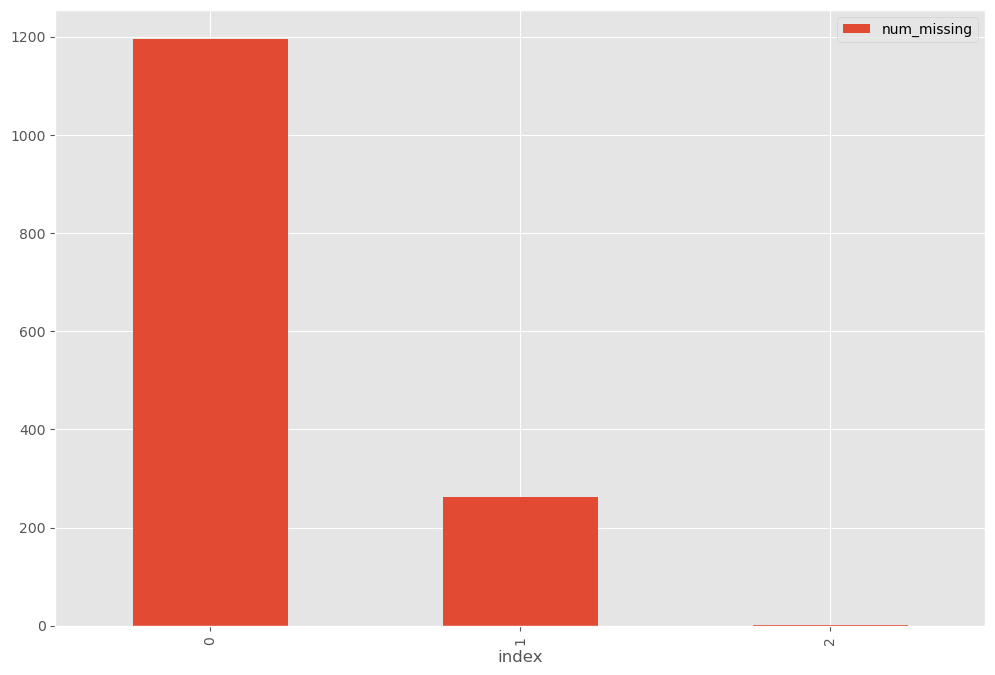

In [163]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_numeric.columns:
    missing = df_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_numeric.columns if 'ismissing' in col]
df_numeric['num_missing'] = df_numeric[ismissing_cols].sum(axis=1)

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

created missing indicator for: Electrical


<AxesSubplot:xlabel='index'>

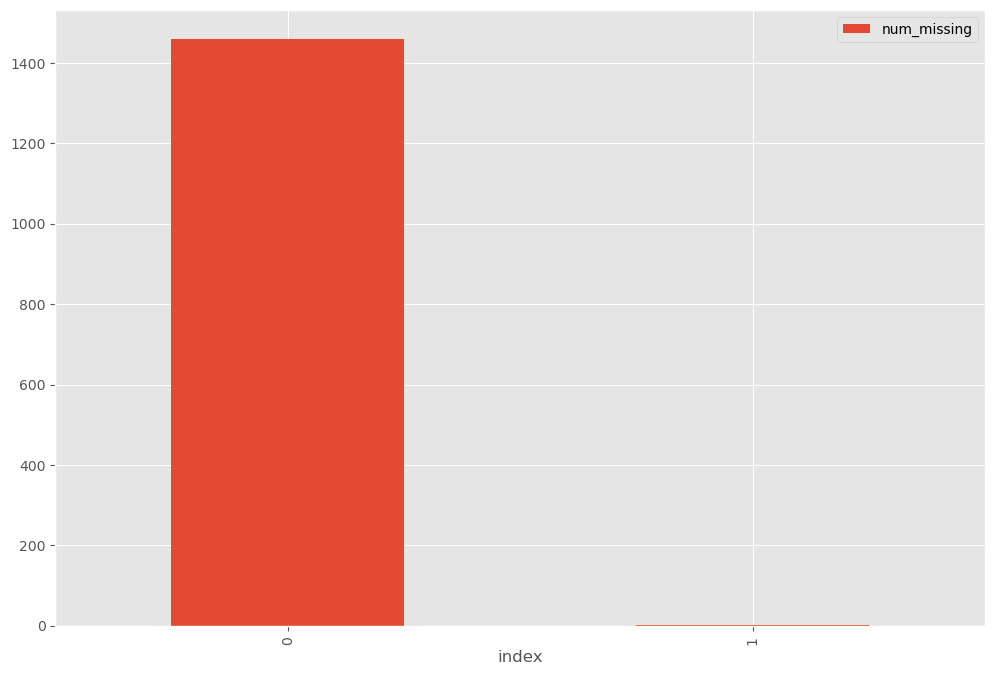

In [164]:
# creating a histogram to show missing values among all the dataset
 
# first create missing indicator for features with missing data
for col in df_non_numeric.columns:
    missing = df_non_numeric[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_non_numeric['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df_non_numeric.columns if 'ismissing' in col]
df_non_numeric['num_missing'] = df_non_numeric[ismissing_cols].sum(axis=1)

df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [165]:
df_numeric['num_missing'].value_counts()


0    1195
1     263
2       2
Name: num_missing, dtype: int64

In [166]:
missing_rows = df_numeric.loc[df_numeric['num_missing'] > 0]
missing_rows

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_ismissing,MasVnrArea_ismissing,num_missing
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,True,False,1
12,13,20,NaN,12968,5,6,1962,1962,0.0,737,0,175,912,912,0,0,912,1,0,1,0,2,1,4,0,1962.0,1,352,140,0,0,0,176,0,0,9,2008,144000,True,False,1
14,15,20,NaN,10920,6,5,1960,1960,212.0,733,0,520,1253,1253,0,0,1253,1,0,1,1,2,1,5,1,1960.0,1,352,0,213,176,0,0,0,0,5,2008,157000,True,False,1
16,17,20,NaN,11241,6,7,1970,1970,180.0,578,0,426,1004,1004,0,0,1004,1,0,1,0,2,1,5,1,1970.0,2,480,0,0,0,0,0,0,700,3,2010,149000,True,False,1
24,25,20,NaN,8246,5,8,1968,2001,0.0,188,668,204,1060,1060,0,0,1060,1,0,1,0,3,1,6,1,1968.0,1,270,406,90,0,0,0,0,0,5,2010,154000,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,NaN,12546,6,7,1981,1981,310.0,678,0,762,1440,1440,0,0,1440,0,0,2,0,3,1,7,1,1981.0,2,467,0,0,99,0,0,0,0,4,2007,182900,True,False,1
1431,1432,120,NaN,4928,6,6,1976,1976,0.0,958,0,0,958,958,0,0,958,0,0,2,0,2,1,5,0,1976.0,2,440,0,60,0,0,0,0,0,10,2009,143750,True,False,1
1441,1442,120,NaN,4426,6,5,2004,2004,147.0,697,0,151,848,848,0,0,848,1,0,1,0,1,1,3,1,2004.0,2,420,149,0,0,0,0,0,0,5,2008,149300,True,False,1
1443,1444,30,NaN,8854,6,6,1916,1950,0.0,0,0,952,952,952,0,0,952,0,0,1,0,2,1,4,1,1916.0,1,192,0,98,0,0,40,0,0,5,2009,121000,True,False,1


- drop the rows with missing values

In [167]:
#df_numeric = df_numeric.drop(df_numeric[df_numeric['num_missing']>0].index)
df_numeric = df_numeric[df_numeric['num_missing']==0].reset_index(drop=True)


<AxesSubplot:xlabel='index'>

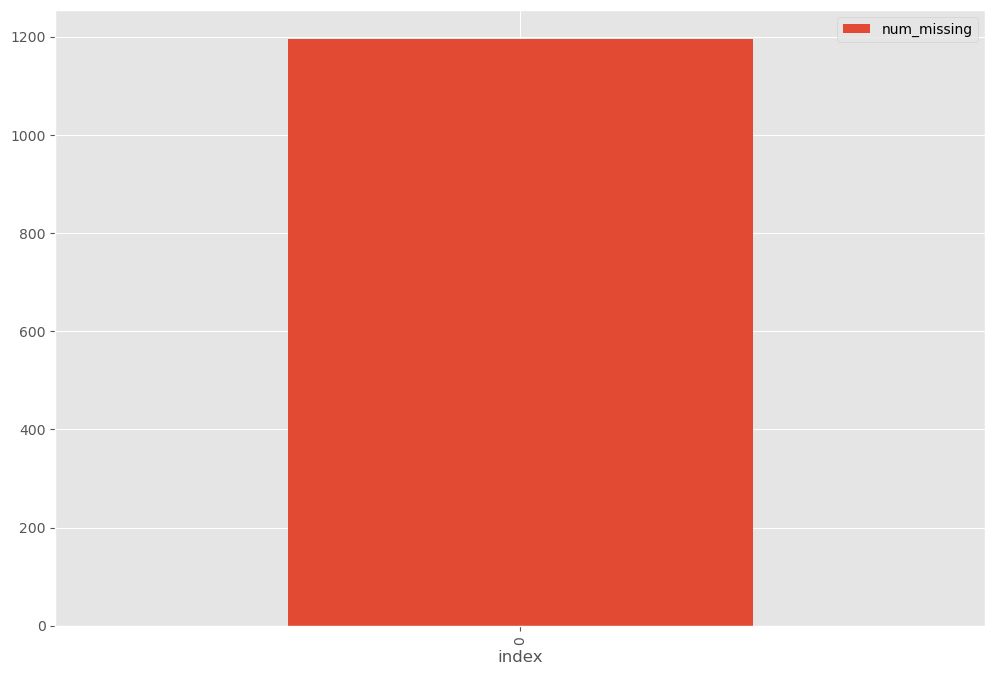

In [168]:

df_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

In [169]:
missing_rows['SalePrice'].mean()

183073.01509433961

- Since  'LotFrontage' is  missing in the overall data frame, it is best to drop them

In [170]:
df_non_numeric['num_missing'].value_counts()

0    1459
1       1
Name: num_missing, dtype: int64

In [171]:
missing_row = df[df_non_numeric['num_missing']> 0]
missing_row

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_ismissing,Alley_ismissing,MasVnrType_ismissing,MasVnrArea_ismissing,BsmtQual_ismissing,BsmtCond_ismissing,BsmtExposure_ismissing,BsmtFinType1_ismissing,BsmtFinType2_ismissing,Electrical_ismissing,FireplaceQu_ismissing,GarageType_ismissing,GarageYrBlt_ismissing,GarageFinish_ismissing,GarageQual_ismissing,GarageCond_ismissing,PoolQC_ismissing,Fence_ismissing,MiscFeature_ismissing,num_missing
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,6


In [172]:
#df_non_numeric = df_non_numeric.drop(df_non_numeric[df_non_numeric['num_missing']>0].index)
df_non_numeric = df_non_numeric[df_non_numeric['num_missing']==0].reset_index(drop=True)


<AxesSubplot:xlabel='index'>

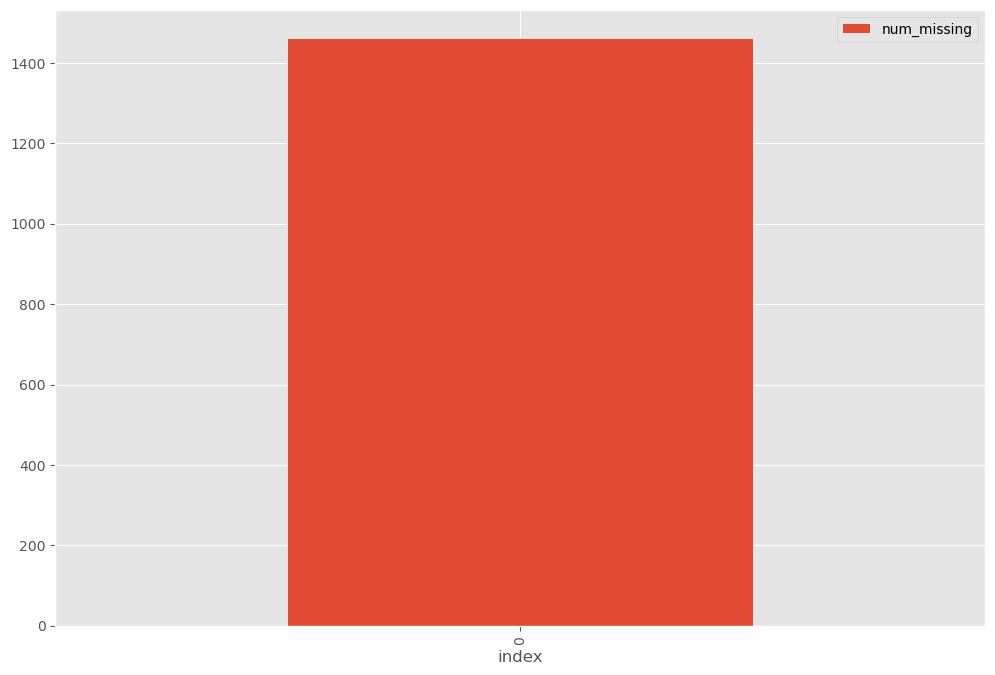

In [173]:
df_non_numeric['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

2- Check for **Outliers**
- Numerical

[Text(0, 0, 'MSSubClass'),
 Text(1, 0, 'LotFrontage'),
 Text(2, 0, 'LotArea'),
 Text(3, 0, 'OverallQual'),
 Text(4, 0, 'OverallCond'),
 Text(5, 0, 'YearBuilt'),
 Text(6, 0, 'YearRemodAdd'),
 Text(7, 0, 'MasVnrArea'),
 Text(8, 0, 'TotalBsmtSF'),
 Text(9, 0, '1stFlrSF'),
 Text(10, 0, '2ndFlrSF'),
 Text(11, 0, 'LowQualFinSF'),
 Text(12, 0, 'GrLivArea'),
 Text(13, 0, 'BsmtFullBath'),
 Text(14, 0, 'BsmtHalfBath'),
 Text(15, 0, 'FullBath'),
 Text(16, 0, 'HalfBath'),
 Text(17, 0, 'BedroomAbvGr'),
 Text(18, 0, 'KitchenAbvGr'),
 Text(19, 0, 'TotRmsAbvGrd'),
 Text(20, 0, 'Fireplaces'),
 Text(21, 0, 'GarageCars'),
 Text(22, 0, 'GarageArea'),
 Text(23, 0, 'WoodDeckSF'),
 Text(24, 0, 'OpenPorchSF'),
 Text(25, 0, 'EnclosedPorch'),
 Text(26, 0, '3SsnPorch'),
 Text(27, 0, 'ScreenPorch'),
 Text(28, 0, 'PoolArea'),
 Text(29, 0, 'MiscVal'),
 Text(30, 0, 'YrSold'),
 Text(31, 0, 'SalePrice')]

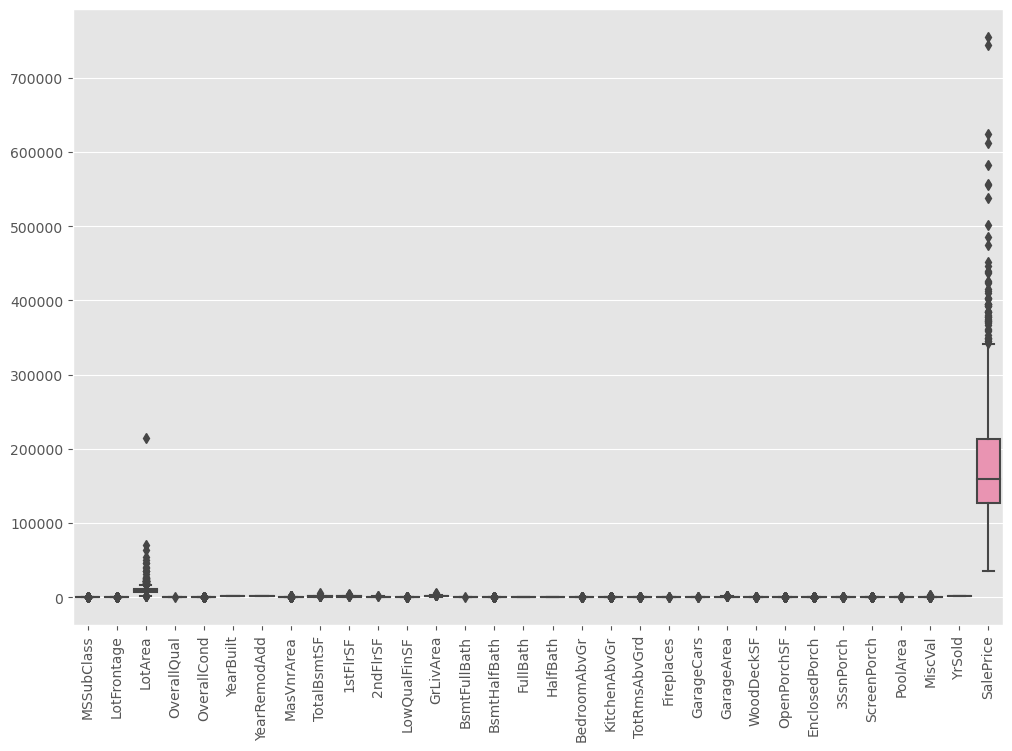

In [174]:
ax = sns.boxplot(data=df_numeric[[ 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF', 'LowQualFinSF',
 'GrLivArea' ,'BsmtFullBath', 'BsmtHalfBath' ,'FullBath', 'HalfBath',
 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd' ,'Fireplaces', 'GarageYrBlt',
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','YrSold',
 'SalePrice' ]])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LotArea'>

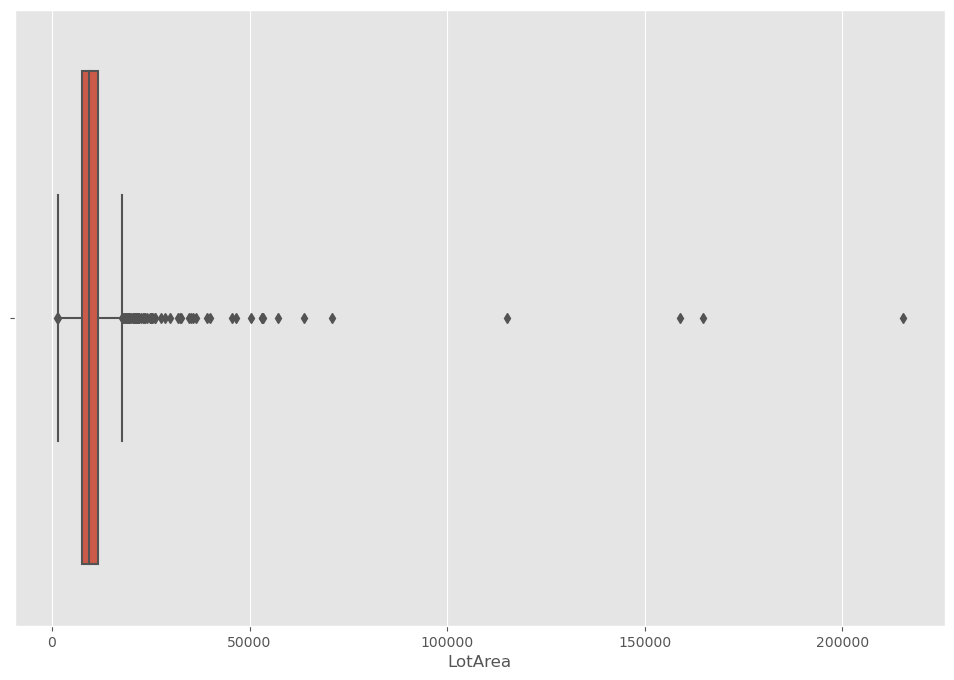

In [175]:
sns.boxplot(df['LotArea'])

In [176]:

# Position of the Outlier
print(np.where(df_numeric['LotArea']>50000))

(array([  44,  260,  373,  639, 1063], dtype=int64),)


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual'>

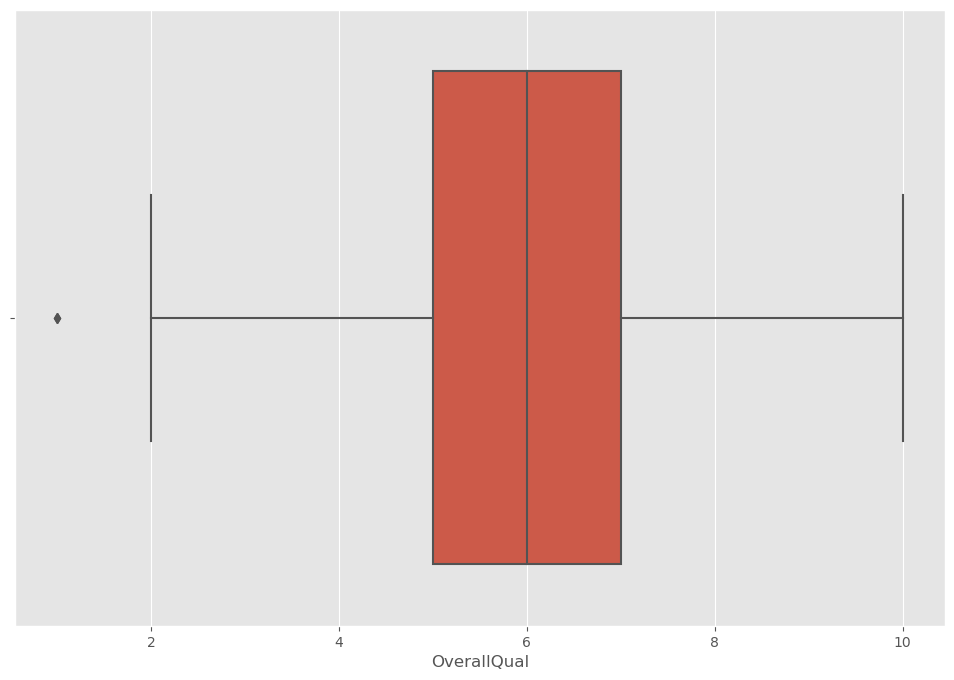

In [177]:
sns.boxplot(df['OverallQual'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallCond'>

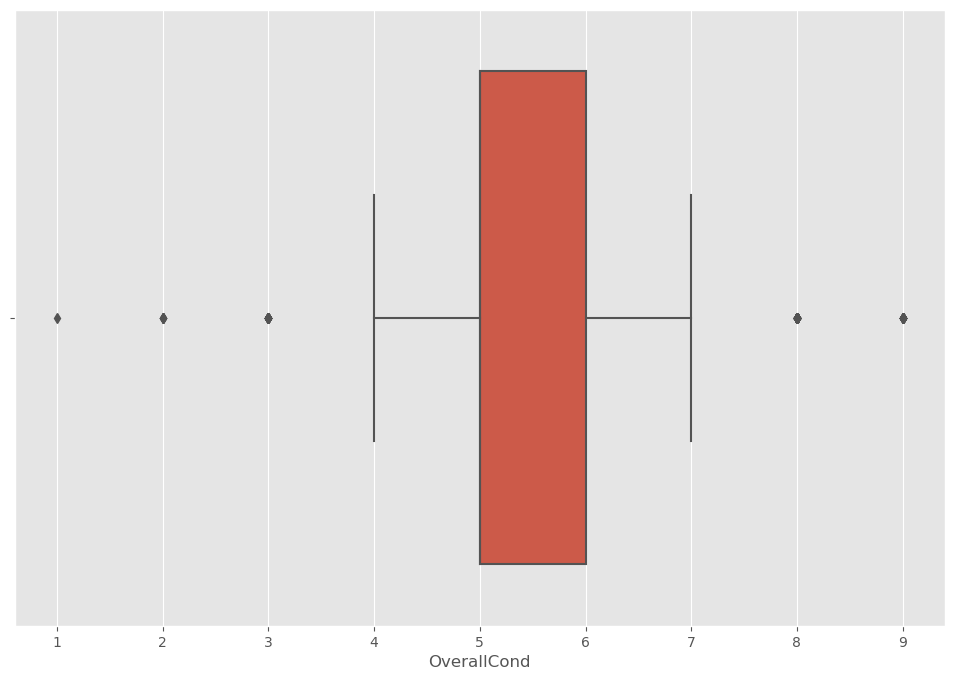

In [178]:
sns.boxplot(df['OverallCond'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearBuilt'>

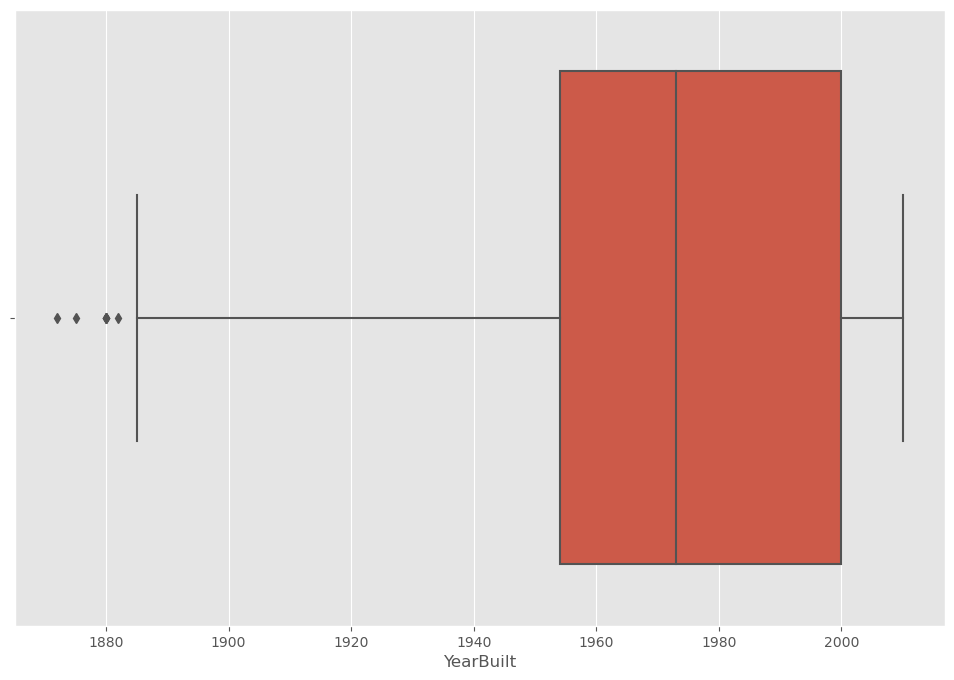

In [179]:
sns.boxplot(df['YearBuilt'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GrLivArea'>

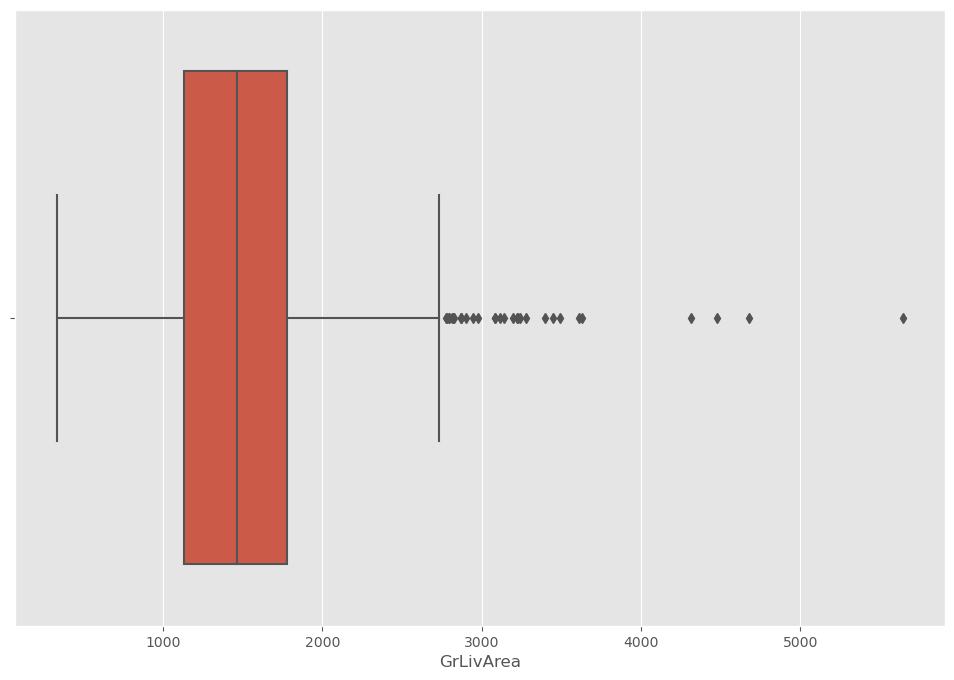

In [180]:
sns.boxplot(df['GrLivArea'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalBsmtSF'>

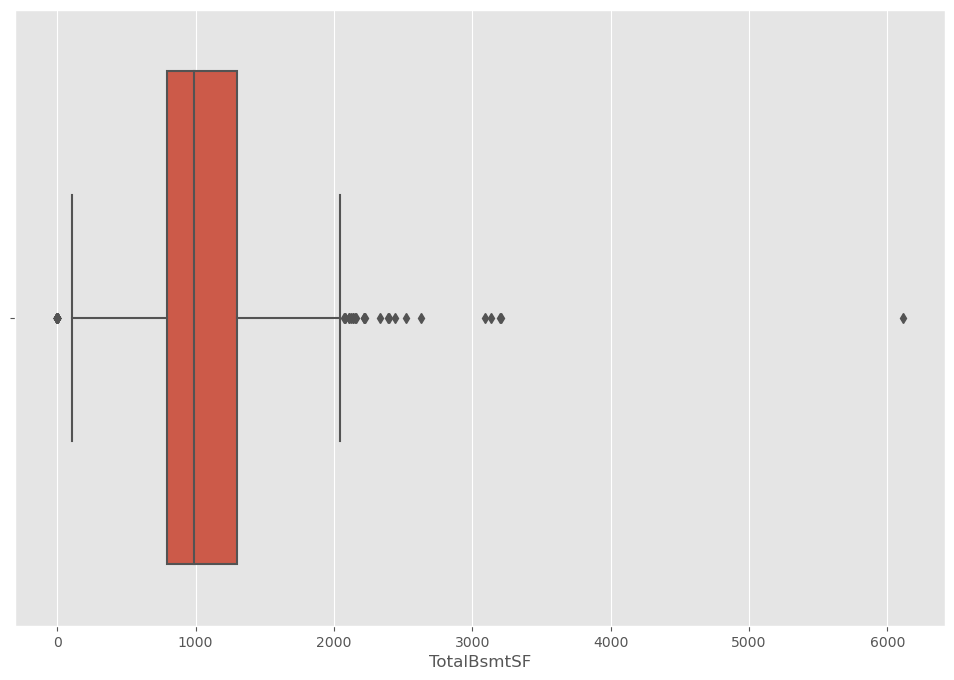

In [181]:
sns.boxplot(df['TotalBsmtSF'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

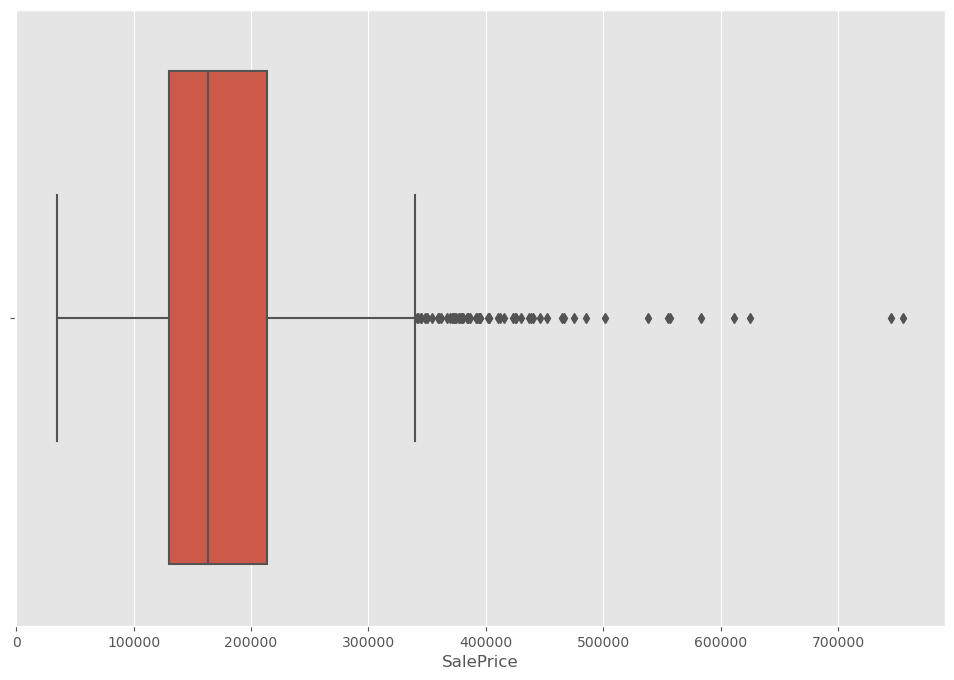

In [182]:
sns.boxplot(df['SalePrice'])

- Data in the boxplots that are outside the skewers are acting as outliers


In [183]:

''' Detection '''
# IQR
Q1 = np.percentile(df_numeric['SalePrice'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_numeric['SalePrice'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df_numeric.shape)
 
# Upper bound
upper = np.where(df_numeric['SalePrice'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_numeric['SalePrice'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df_numeric.drop(upper[0], inplace = True)
df_numeric.drop(lower[0], inplace = True)
 
print("New Shape: ", df_numeric.shape)

Old Shape:  (1195, 41)
New Shape:  (1139, 41)


In [184]:
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_ismissing,MasVnrArea_ismissing,num_missing
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,False,False,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,False,False,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,False,False,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,False,False,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,False,False,0


In [185]:
df_numeric.drop(df_numeric.iloc[:, 0:1], inplace=True, axis=1)

In [186]:
df_numeric.describe()


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,num_missing
count,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.00000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.00000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.000000,1139.0
mean,57.875329,69.089552,9490.604917,5.984197,5.583845,1968.968393,1984.166813,87.527656,395.235294,43.964004,582.32748,1021.526778,1124.844601,334.136084,6.479368,1465.460053,0.391572,0.055312,1.539069,0.353819,2.861282,1.054434,6.425812,0.538191,1.705882,455.964881,84.425812,43.690957,23.75856,2.894644,14.515364,2.401229,26.877963,6.321335,2007.805092,168332.653205,0.0
std,43.728455,23.833651,4800.417619,1.307581,1.105484,31.534828,21.232173,161.727678,431.115167,155.912230,436.22806,418.231728,358.270719,417.782059,49.979348,482.328322,0.512891,0.236248,0.537693,0.496394,0.797669,0.238303,1.541597,0.611179,0.751373,211.549183,115.814152,65.286049,62.86772,27.807639,54.788862,36.390501,194.788141,2.696478,1.330569,60934.906319,0.0
min,20.000000,21.000000,1300.000000,1.000000,2.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.00000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.0
25%,20.000000,59.000000,7235.500000,5.000000,5.000000,1949.000000,1965.000000,0.000000,0.000000,0.000000,244.00000,777.000000,864.000000,0.000000,0.000000,1121.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,308.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,126000.000000,0.0
50%,50.000000,68.000000,9100.000000,6.000000,5.000000,1970.000000,1993.000000,0.000000,336.000000,0.000000,506.00000,967.000000,1063.000000,0.000000,0.000000,1428.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.000000,2.000000,470.000000,0.000000,20.000000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,155000.000000,0.0
75%,70.000000,80.000000,10924.000000,7.000000,6.000000,2000.000000,2004.000000,130.000000,659.500000,0.000000,832.50000,1249.500000,1337.000000,714.500000,0.000000,1718.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,159.500000,63.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,201750.000000,0.0
max,190.000000,313.000000,70761.000000,10.000000,9.000000,2009.000000,2010.000000,1600.000000,5644.000000,1474.000000,2042.00000,6110.000000,4692.000000,1818.000000,515.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,736.000000,547.000000,552.00000,508.000000,480.000000,648.000000,3500.000000,12.000000,2010.000000,341000.000000,0.0


- From the data frame above, we can detect outliers comparing the mean with its max value,
for example,
 - pool area mean = 2 while max = 783


- from describe, 4 group plots were created depending on the variables scale

Tukey’s box plot method

Next to its visual benefits, the box plot provides useful statistics to identify individual observations as outliers. Tukey distinguishes between possible and probable outliers. A possible outlier is located between the inner and the outer fence, whereas a probable outlier is located outside the outer fence.

In [187]:
#Tukey's method
def tukeys_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob, outliers_poss
        


-  identify the actual indexes of the outlying observations

In [188]:

probable_outliers_indicies = []
possible_outliers_indicies =[]

In [189]:
df_G1 = df_numeric[[ 'MSSubClass','LotFrontage', 'LowQualFinSF' , 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
 '3SsnPorch', 'ScreenPorch','PoolArea' ]].copy()
df_G2 = df_numeric[['BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','GarageArea','MasVnrArea','MiscVal']].copy()
df_G3 = df_numeric[['LotArea']].copy()
df_G4 = df_numeric[['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold']].copy()

<AxesSubplot:>

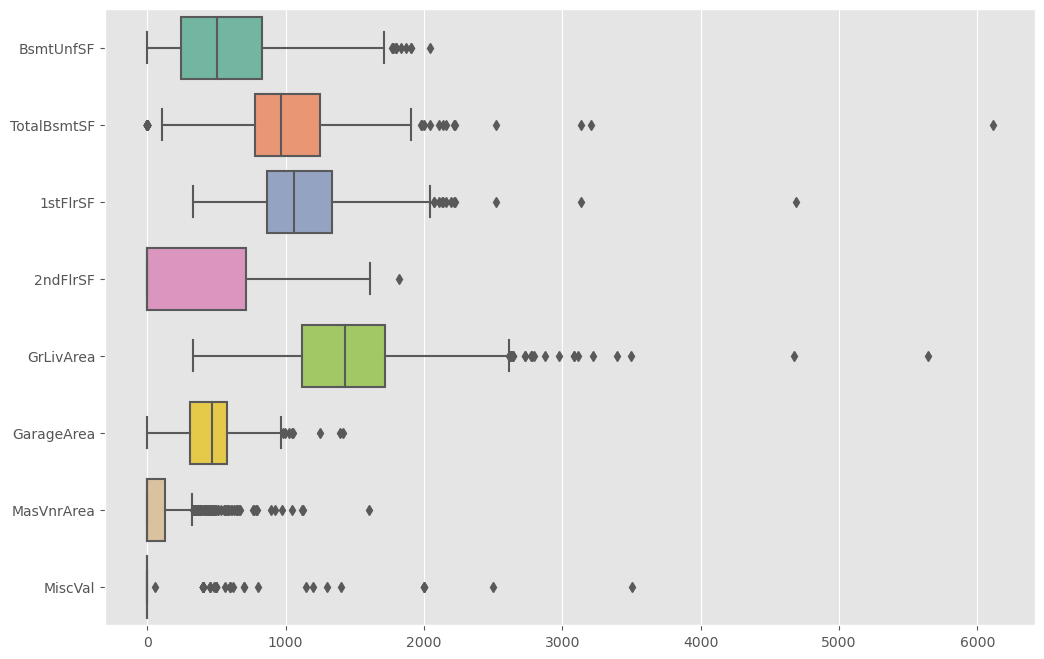

In [190]:
sns.boxplot(data=df_G2, orient="h", palette="Set2")

MiscVal is mostly outliers

Text(0.5, 0, 'Above grade (ground) living area square feet')

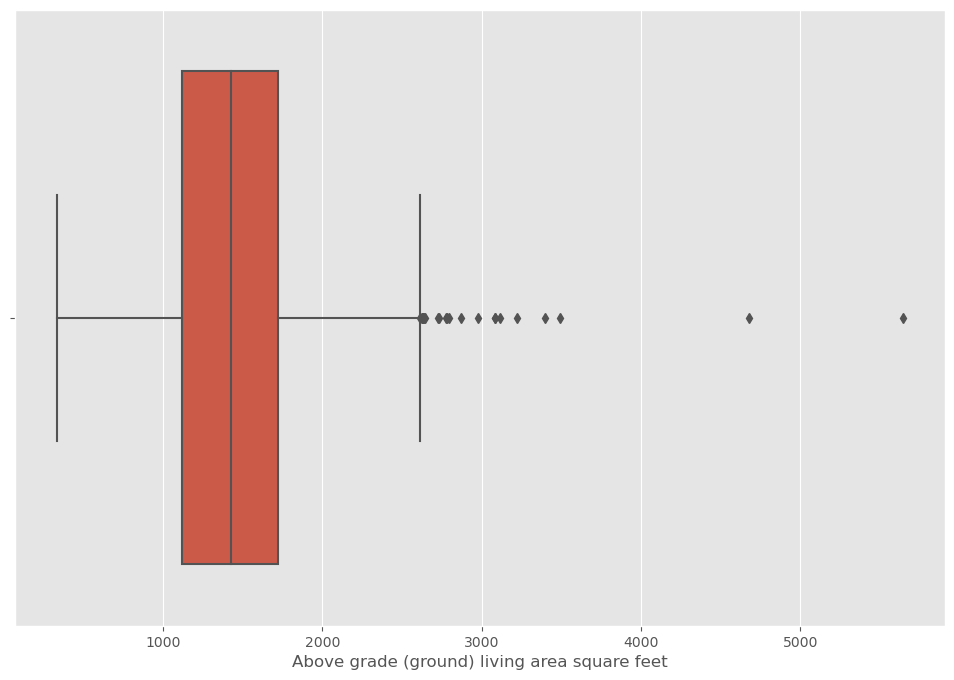

In [191]:
ax = sns.boxplot(x=df_numeric["GrLivArea"])
ax.set_xlabel('Above grade (ground) living area square feet')

In [192]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GrLivArea")
probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)
#possible_outliers_indicies

Probable outliers [523, 691, 1182, 1298]
Possible outliers [58, 118, 185, 197, 231, 304, 324, 496, 523, 583, 608, 635, 691, 769, 798, 803, 961, 1024, 1031, 1046, 1142, 1169, 1173, 1175, 1182, 1268, 1298, 1312, 1328, 1353, 1386]


Text(0.5, 0, 'Total square feet of basement area')

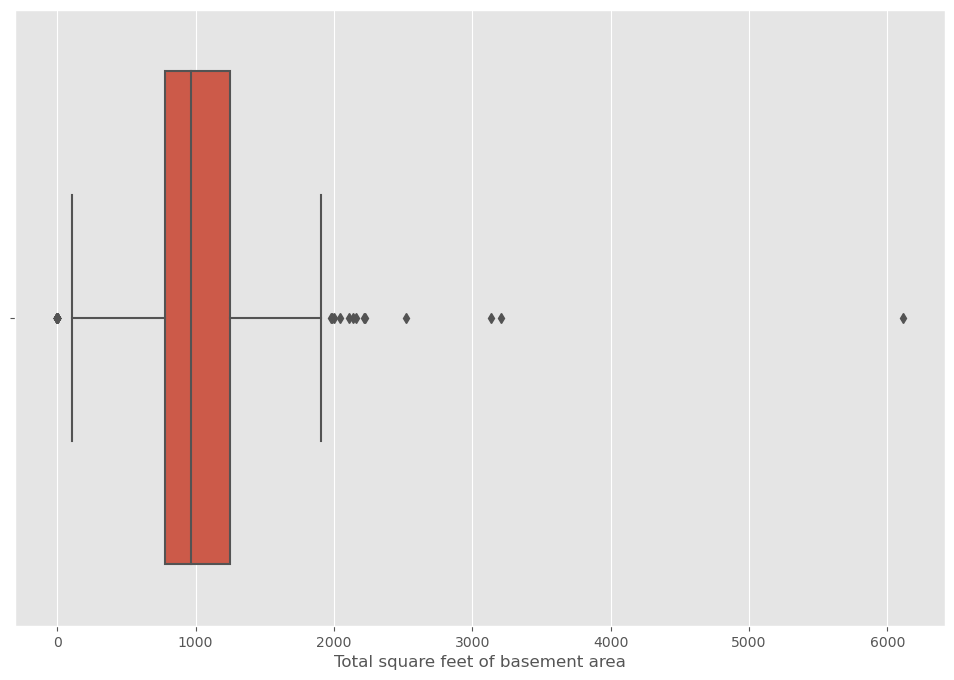

In [193]:
ax = sns.boxplot(x=df_numeric["TotalBsmtSF"])
ax.set_xlabel('Total square feet of basement area')

In [194]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "TotalBsmtSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [332, 440, 496, 523, 1298]
Possible outliers [17, 39, 70, 90, 102, 156, 178, 182, 224, 259, 278, 313, 332, 342, 362, 371, 392, 440, 477, 496, 520, 523, 532, 533, 553, 646, 654, 664, 691, 705, 736, 749, 778, 825, 868, 888, 894, 897, 898, 984, 1000, 1011, 1035, 1044, 1045, 1048, 1049, 1090, 1179, 1182, 1205, 1216, 1218, 1223, 1232, 1243, 1250, 1298, 1321, 1373, 1412]


Text(0.5, 0, 'First Floor square feet')

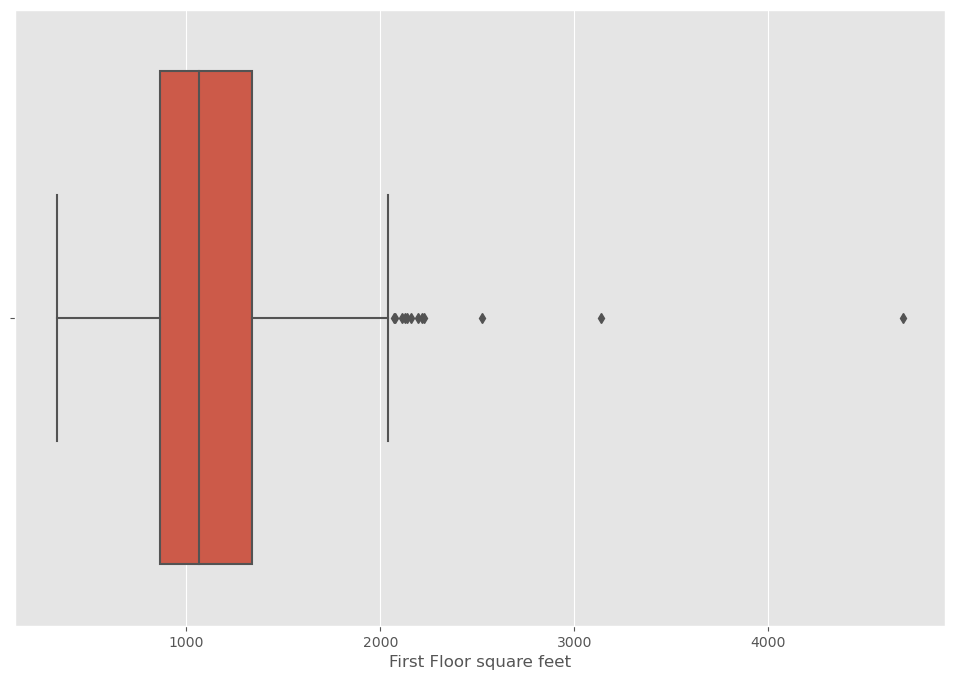

In [195]:
ax = sns.boxplot(x=df_numeric["1stFlrSF"])
ax.set_xlabel('First Floor square feet')

In [196]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "1stFlrSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [496, 523, 1298]
Possible outliers [66, 70, 113, 175, 178, 224, 440, 496, 523, 529, 691, 888, 898, 1024, 1044, 1182, 1205, 1298, 1346, 1373]


In [197]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "BsmtUnfSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [22, 78, 137, 169, 224, 238, 278, 350, 477, 496, 552, 581, 618, 678, 768, 774, 798, 803, 843, 928, 932, 963, 1008, 1046, 1166, 1241, 1267, 1318, 1324]


In [198]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "2ndFlrSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [691, 1182]


In [199]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GarageArea")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [581, 1190, 1298]
Possible outliers [178, 224, 270, 317, 408, 581, 664, 718, 803, 825, 1061, 1087, 1142, 1184, 1190, 1228, 1241, 1268, 1298, 1350, 1417]


In [200]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "MasVnrArea")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [58, 70, 105, 115, 161, 178, 224, 297, 349, 477, 517, 523, 691, 755, 763, 798, 808, 825, 898, 981, 1169, 1228, 1289, 1298, 1373, 1417]
Possible outliers [25, 37, 56, 58, 64, 70, 80, 81, 82, 104, 105, 109, 115, 151, 159, 161, 169, 173, 178, 180, 224, 231, 235, 249, 251, 297, 343, 349, 359, 362, 363, 403, 412, 423, 477, 479, 481, 517, 523, 524, 539, 540, 591, 598, 618, 623, 640, 654, 661, 678, 691, 700, 702, 718, 731, 755, 759, 763, 769, 798, 803, 808, 815, 825, 895, 898, 944, 955, 961, 981, 987, 990, 997, 1059, 1083, 1111, 1169, 1191, 1193, 1209, 1228, 1256, 1268, 1275, 1286, 1287, 1289, 1298, 1324, 1336, 1353, 1373, 1417, 1420, 1426, 1437, 1447]


------------------

<AxesSubplot:>

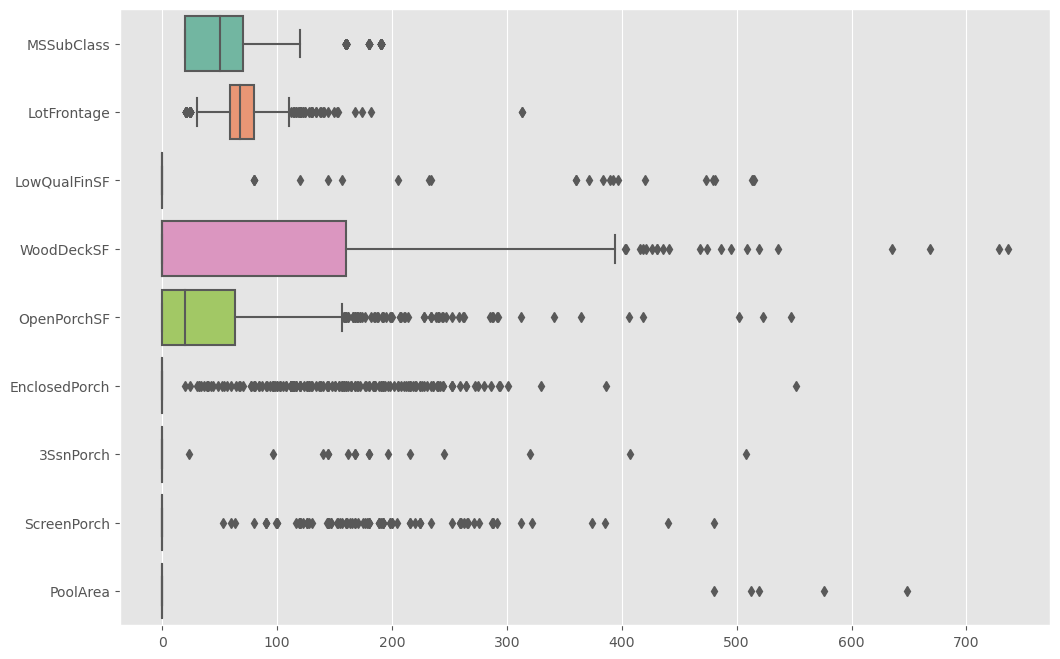

In [201]:
sns.boxplot(data=df_G1, orient="h", palette="Set2")

From the plot it is shown tha the last 4 variables are mostly outliers

In [202]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "LotFrontage")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [197, 231, 313, 807, 909, 934, 1107, 1127, 1182, 1211, 1298, 1337]
Possible outliers [36, 41, 56, 75, 85, 86, 145, 150, 159, 171, 193, 195, 197, 225, 227, 231, 232, 235, 260, 276, 277, 290, 302, 306, 313, 363, 429, 430, 432, 434, 446, 489, 500, 504, 523, 599, 614, 649, 655, 662, 675, 758, 807, 825, 829, 837, 889, 906, 909, 915, 934, 956, 959, 962, 963, 966, 991, 1007, 1010, 1029, 1038, 1039, 1061, 1088, 1091, 1104, 1106, 1107, 1127, 1151, 1160, 1168, 1169, 1173, 1182, 1191, 1211, 1219, 1273, 1291, 1298, 1334, 1337, 1339, 1359, 1361, 1378, 1449]


In [203]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "WoodDeckSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [53, 1068, 1459]
Possible outliers [53, 64, 166, 169, 172, 302, 335, 343, 357, 480, 538, 661, 674, 769, 828, 848, 893, 951, 961, 974, 1044, 1068, 1076, 1130, 1141, 1190, 1210, 1312, 1313, 1423, 1440, 1459]


In [204]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "OpenPorchSF")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [495, 499, 523, 583, 591, 645, 713, 735, 784, 807, 854, 875, 961, 996, 1193, 1292, 1298, 1328]
Possible outliers [7, 14, 28, 81, 87, 112, 126, 176, 183, 185, 198, 217, 222, 238, 291, 293, 309, 316, 377, 384, 391, 414, 449, 495, 499, 523, 549, 583, 591, 603, 621, 641, 645, 664, 666, 713, 735, 745, 765, 775, 784, 803, 807, 854, 860, 875, 883, 888, 914, 918, 932, 947, 953, 961, 988, 996, 1106, 1109, 1123, 1164, 1184, 1193, 1203, 1227, 1234, 1243, 1278, 1287, 1292, 1298, 1310, 1317, 1328, 1336, 1354, 1369, 1372, 1374, 1423]


<AxesSubplot:>

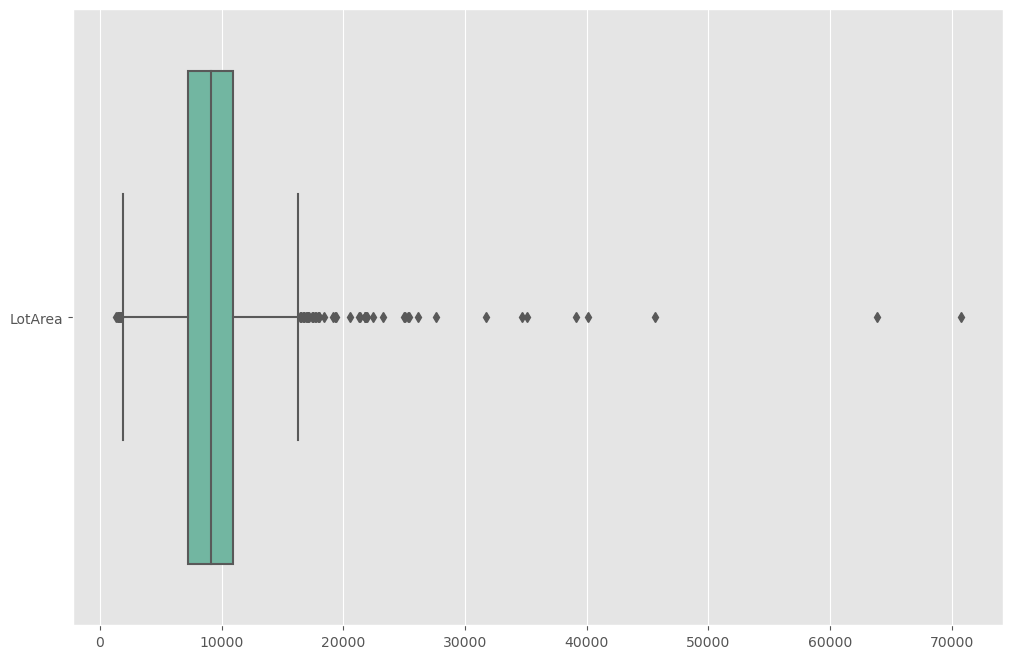

In [205]:
sns.boxplot(data=df_G3, orient="h", palette="Set2")

In [206]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "LotArea")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [53, 171, 197, 249, 271, 313, 335, 384, 411, 451, 457, 523, 529, 588, 661, 692, 706, 769, 828, 848, 876, 934, 939, 943, 1057, 1169, 1184, 1190, 1260, 1287, 1298, 1383, 1396, 1446]
Possible outliers [53, 66, 113, 120, 159, 171, 185, 197, 249, 260, 271, 277, 304, 313, 335, 349, 364, 384, 411, 417, 422, 451, 457, 523, 529, 558, 563, 588, 661, 664, 666, 691, 692, 706, 726, 769, 807, 828, 848, 854, 876, 934, 939, 943, 956, 1010, 1039, 1048, 1057, 1061, 1107, 1151, 1169, 1173, 1184, 1190, 1230, 1260, 1270, 1277, 1287, 1298, 1346, 1383, 1396, 1409, 1423, 1430, 1446]


<AxesSubplot:>

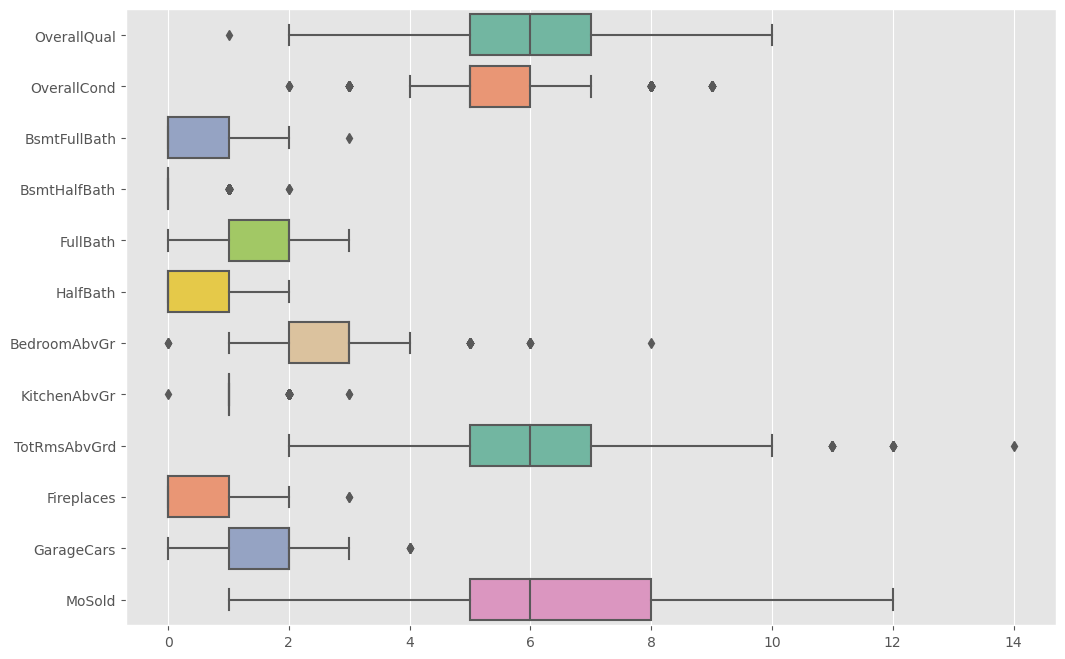

In [207]:
sns.boxplot(data=df_G4, orient="h", palette="Set2")

BsmtHalfBath, KitchenAbvGrd are moslty ouliers

In [208]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "OverallQual")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [58, 185, 224, 375, 389, 440, 515, 523, 533, 583, 591, 636, 691, 825, 916, 994, 1100, 1169, 1182, 1243, 1298, 1373, 1442]


In [209]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "OverallCond")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [88, 185, 191, 218, 241, 250, 304, 375, 378, 398, 461, 508, 519, 583, 676, 703, 726, 745, 980, 991, 1123, 1149, 1213, 1268, 1327, 1352, 1435, 1457]
Possible outliers [1, 15, 24, 88, 91, 95, 114, 125, 184, 185, 190, 191, 218, 235, 241, 246, 250, 267, 299, 304, 323, 344, 346, 353, 363, 375, 378, 383, 386, 390, 398, 402, 410, 425, 436, 439, 450, 461, 482, 489, 494, 503, 508, 519, 529, 531, 533, 568, 583, 588, 592, 607, 620, 636, 662, 676, 677, 698, 703, 714, 716, 726, 741, 745, 749, 754, 789, 840, 841, 844, 848, 855, 860, 879, 892, 916, 919, 942, 950, 952, 974, 980, 986, 991, 992, 1000, 1005, 1006, 1030, 1031, 1035, 1041, 1072, 1076, 1093, 1122, 1123, 1130, 1137, 1143, 1149, 1153, 1155, 1156, 1174, 1177, 1192, 1202, 1213, 1223, 1225, 1227, 1257, 1259, 1268, 1310, 1320, 1327, 1352, 1380, 1385, 1397, 1411, 1435, 1457]


In [210]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "BsmtFullBath")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [738]


In [211]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "BedroomAbvGr")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [144, 291, 330, 570, 635, 843, 897, 1350]
Possible outliers [53, 118, 137, 144, 189, 198, 291, 324, 328, 330, 386, 570, 628, 634, 635, 789, 843, 848, 883, 897, 910, 1030, 1031, 1032, 1062, 1068, 1132, 1163, 1213, 1262, 1270, 1328, 1350, 1386, 1387]


In [212]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "TotRmsAbvGrd")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers [635]
Possible outliers [11, 58, 112, 118, 144, 161, 185, 190, 261, 304, 316, 321, 324, 328, 330, 349, 403, 417, 440, 447, 488, 496, 505, 523, 527, 533, 566, 570, 591, 608, 619, 635, 691, 702, 745, 769, 778, 798, 803, 809, 843, 848, 875, 877, 883, 897, 898, 910, 926, 939, 961, 1024, 1030, 1031, 1032, 1043, 1046, 1058, 1062, 1068, 1142, 1169, 1173, 1182, 1230, 1267, 1268, 1275, 1284, 1292, 1298, 1313, 1350, 1386, 1387, 1416, 1440, 1442]


In [213]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "Fireplaces")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [166, 309, 605, 642, 1298]


In [214]:
probable_outliers_tm, possible_outliers_tm = tukeys_method(df, "GarageCars")

probable_outliers_indicies.extend(probable_outliers_tm)
possible_outliers_indicies.extend(possible_outliers_tm)

print('Probable outliers',probable_outliers_tm)
print('Possible outliers',possible_outliers_tm)

Probable outliers []
Possible outliers [420, 747, 1190, 1340, 1350]


Based on Tukey method, Probable ouliers are discarded

In [215]:
probable_list = []

for index in probable_outliers_indicies:
    if index not in probable_list:
        probable_list.append(index)

probable_list

[523,
 691,
 1182,
 1298,
 332,
 440,
 496,
 581,
 1190,
 58,
 70,
 105,
 115,
 161,
 178,
 224,
 297,
 349,
 477,
 517,
 755,
 763,
 798,
 808,
 825,
 898,
 981,
 1169,
 1228,
 1289,
 1373,
 1417,
 197,
 231,
 313,
 807,
 909,
 934,
 1107,
 1127,
 1211,
 1337,
 53,
 1068,
 1459,
 495,
 499,
 583,
 591,
 645,
 713,
 735,
 784,
 854,
 875,
 961,
 996,
 1193,
 1292,
 1328,
 171,
 249,
 271,
 335,
 384,
 411,
 451,
 457,
 529,
 588,
 661,
 692,
 706,
 769,
 828,
 848,
 876,
 939,
 943,
 1057,
 1184,
 1260,
 1287,
 1383,
 1396,
 1446,
 88,
 185,
 191,
 218,
 241,
 250,
 304,
 375,
 378,
 398,
 461,
 508,
 519,
 676,
 703,
 726,
 745,
 980,
 991,
 1123,
 1149,
 1213,
 1268,
 1327,
 1352,
 1435,
 1457,
 144,
 291,
 330,
 570,
 635,
 843,
 897,
 1350]

In [216]:
len(df_numeric.index)

1139

In [217]:
desired_indicies = [i for i in range(len(df_numeric.index)) if i not in probable_list]
numeric_handeled_outliers = df_numeric.iloc[desired_indicies]

In [218]:
numeric_handeled_outliers.shape

(1046, 40)

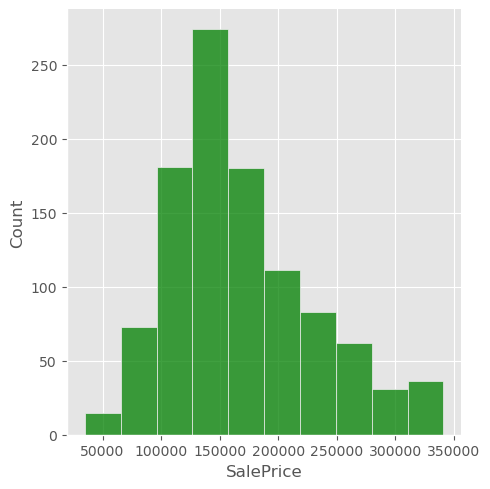

In [219]:
sns.displot(numeric_handeled_outliers['SalePrice'], color='g', bins=10)


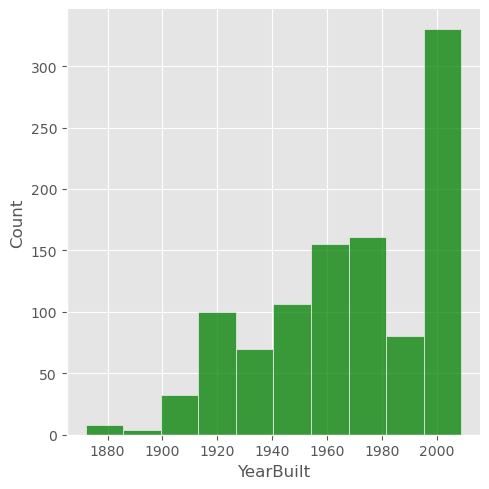

In [220]:
sns.displot(numeric_handeled_outliers['YearBuilt'], color='g', bins=10)

Text(0.5, 1.0, 'Sale Price vs. overall condition of the house')

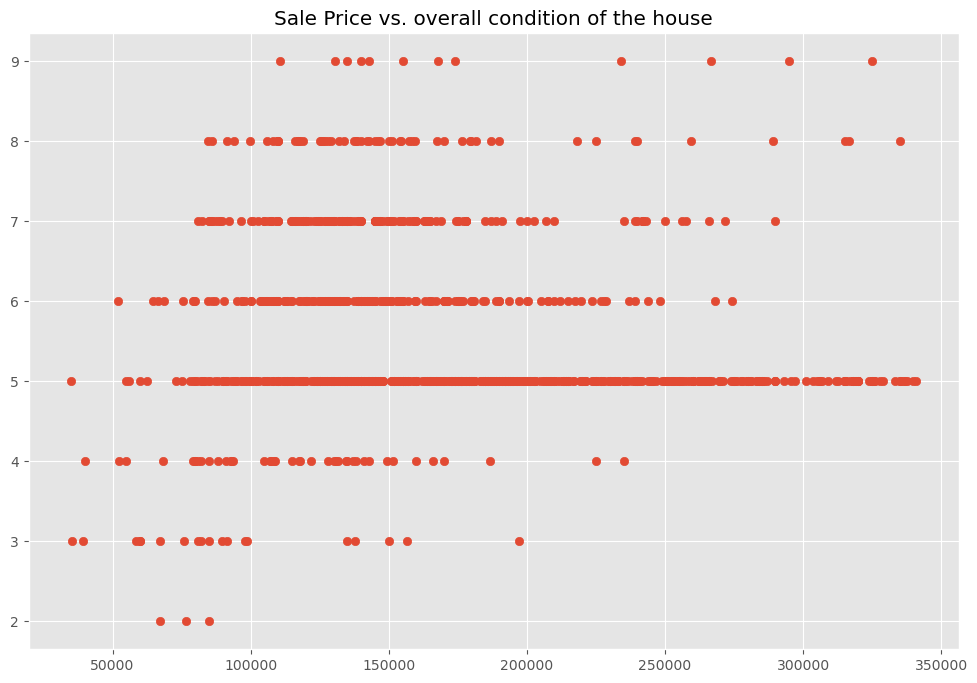

In [221]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['OverallCond'])
plt.title('Sale Price vs. overall condition of the house')

Text(0.5, 1.0, 'Sale Price vs. overall material and finish of the house')

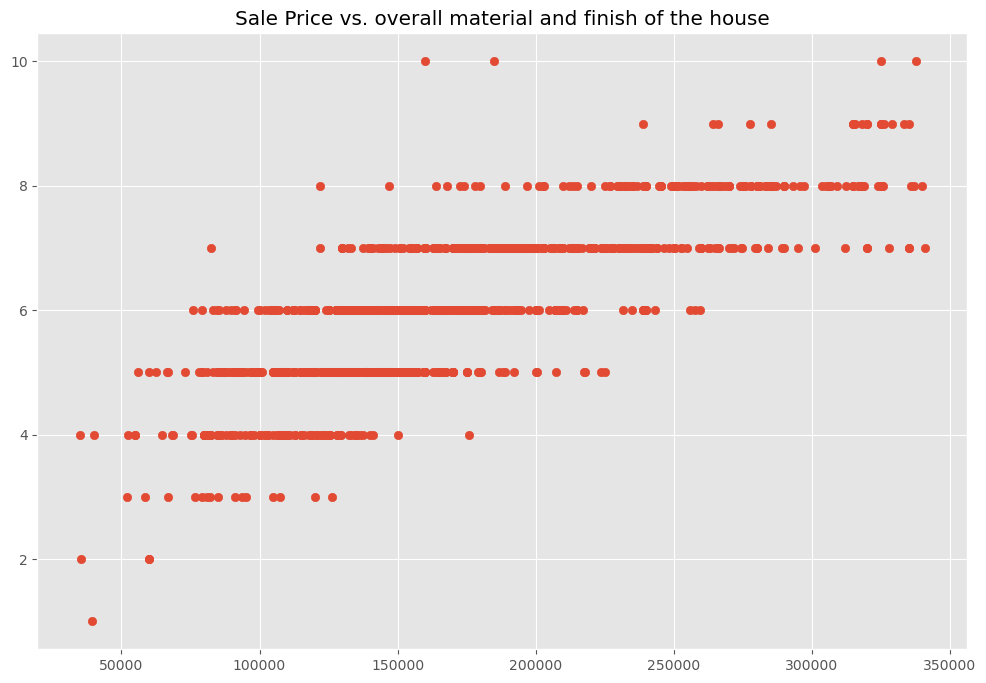

In [222]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['OverallQual'])
plt.title('Sale Price vs. overall material and finish of the house')

Text(0.5, 1.0, 'Sale Price vs. Pool Area - 0=No Pool')

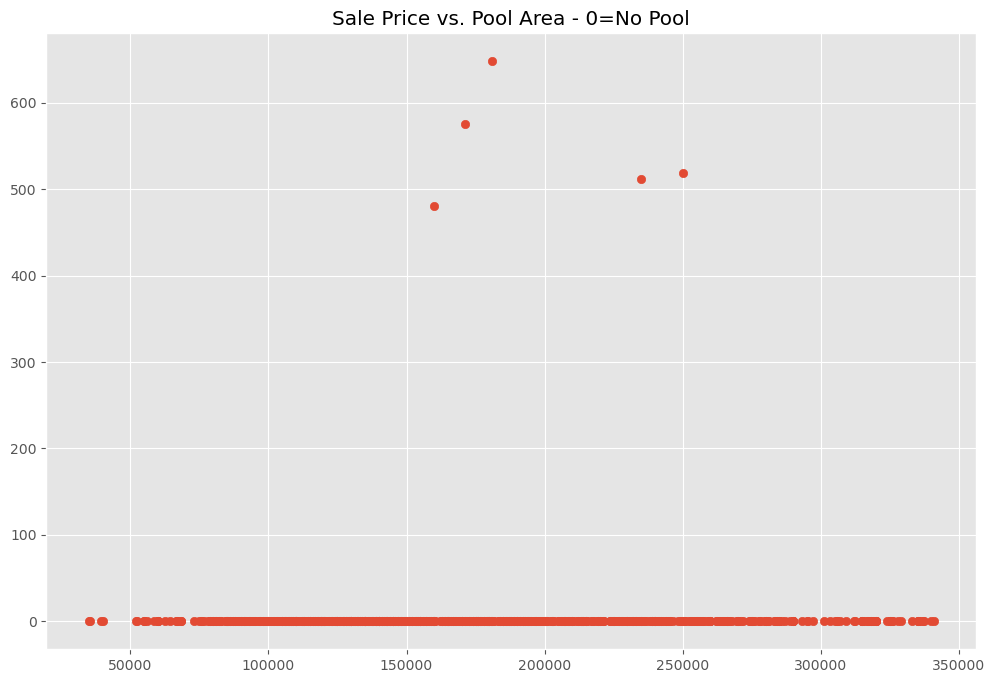

In [223]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['PoolArea'])
plt.title('Sale Price vs. Pool Area - 0=No Pool')

since most observations has no pool, and the remainig acts as ouliers, it is best to drop the feature

Text(0.5, 1.0, 'Sale Price vs. Total square feet of basement area')

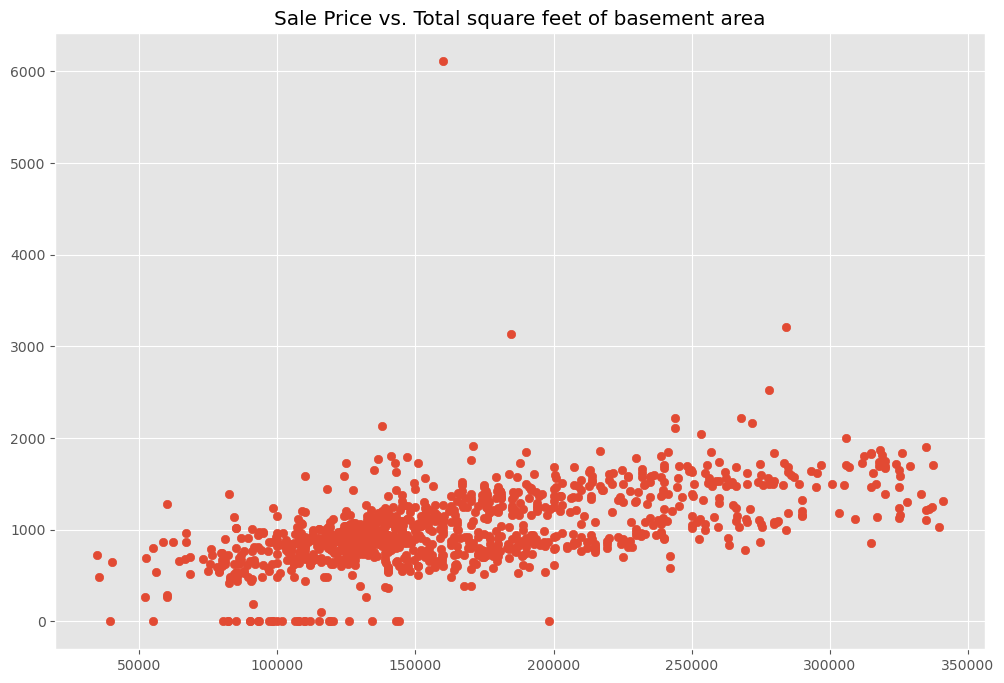

In [224]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['TotalBsmtSF'])
plt.title('Sale Price vs. Total square feet of basement area')

Text(0.5, 1.0, 'Sale Price vs. Lot size in square feet')

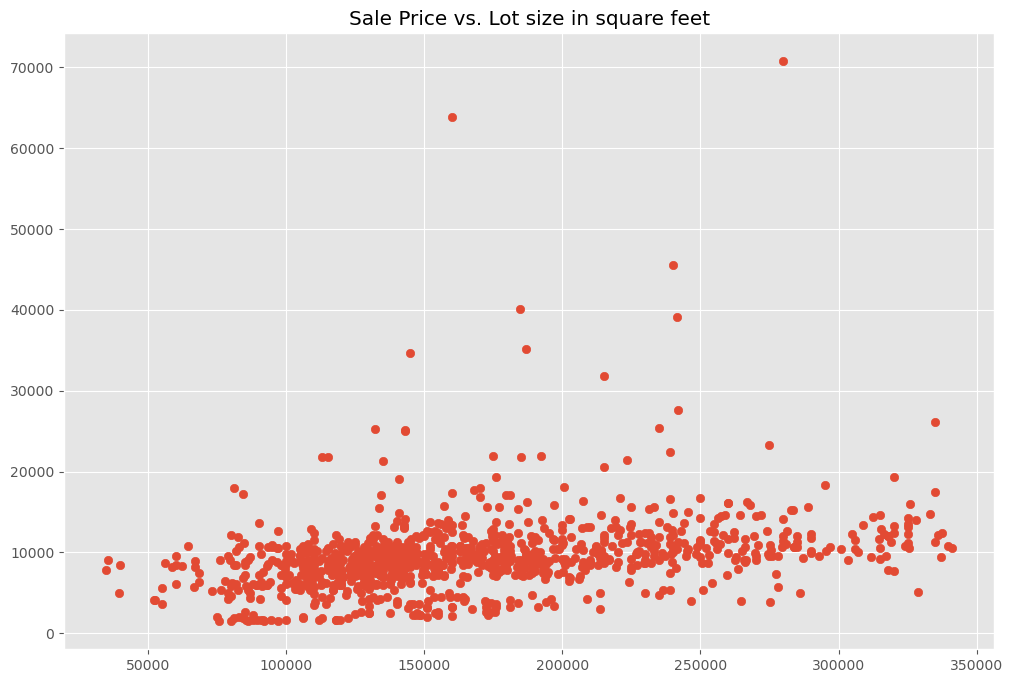

In [225]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['LotArea'])
plt.title('Sale Price vs. Lot size in square feet')

Text(0.5, 1.0, 'Sale Price vs. First Floor square feet')

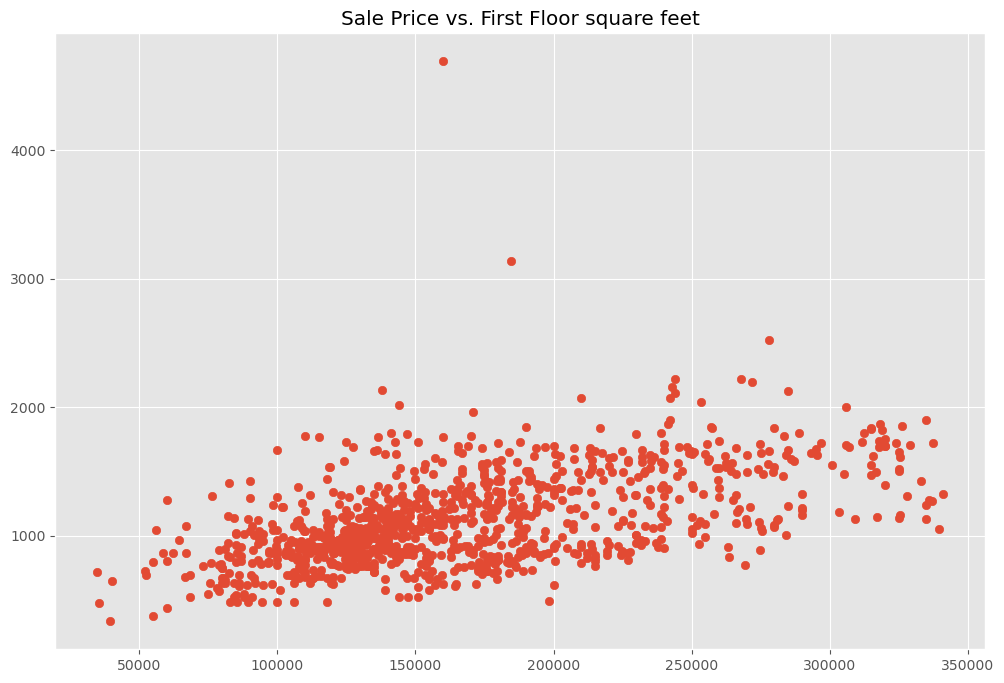

In [226]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['1stFlrSF'])
plt.title('Sale Price vs. First Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Second Floor square feet')

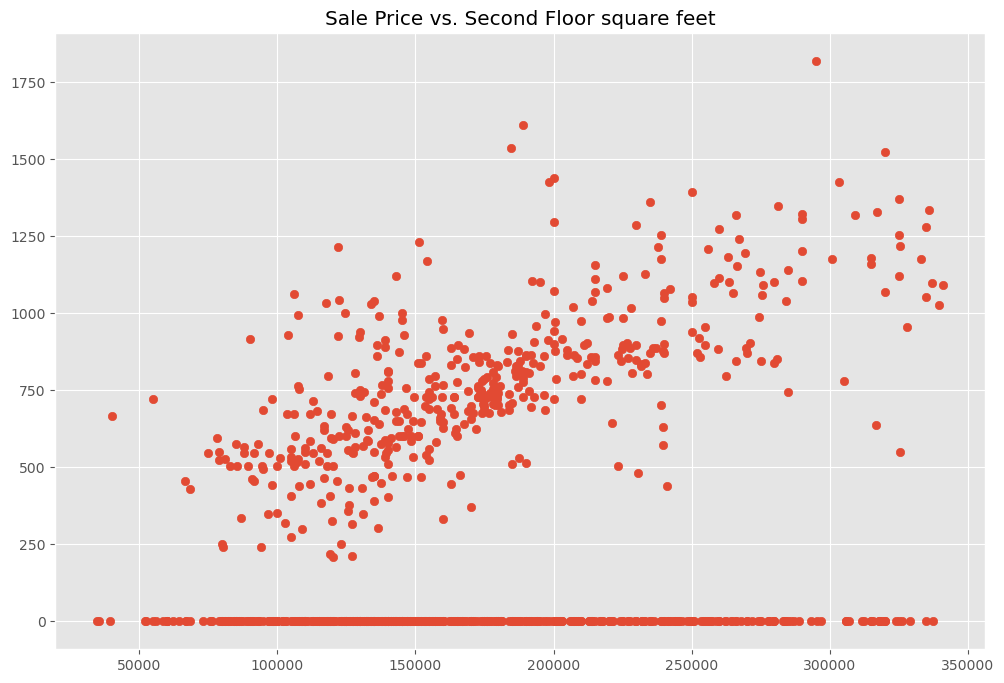

In [227]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['2ndFlrSF'])
plt.title('Sale Price vs. Second Floor square feet')

Text(0.5, 1.0, 'Sale Price vs. Total rooms above grade (does not include bathrooms)')

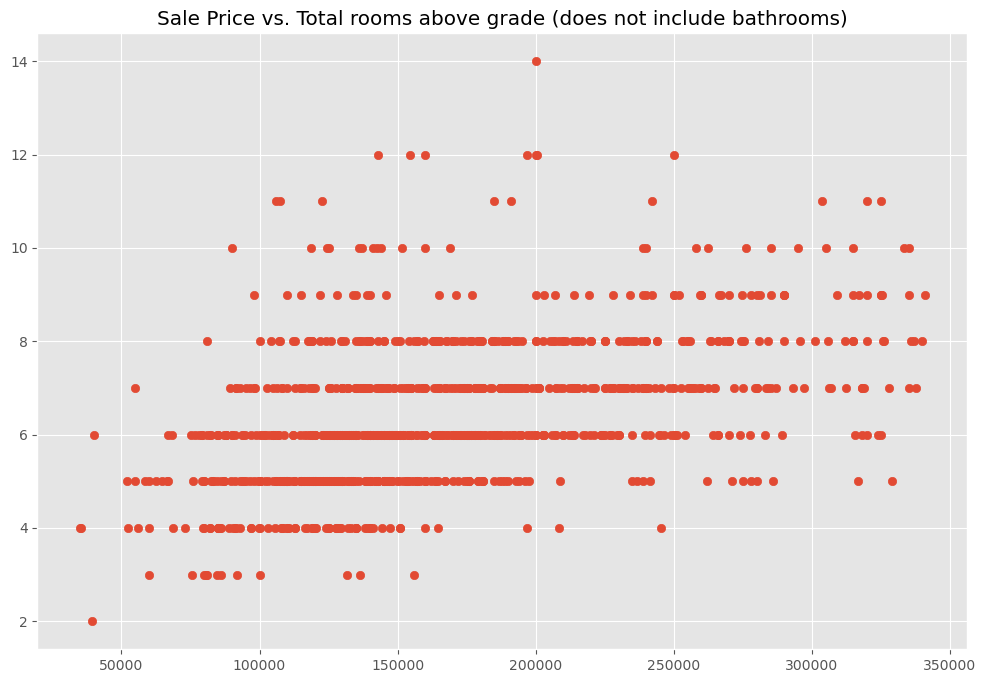

In [228]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['TotRmsAbvGrd'])
plt.title('Sale Price vs. Total rooms above grade (does not include bathrooms)')

Text(0.5, 1.0, 'Sale Price vs. Size of garage in car capacity')

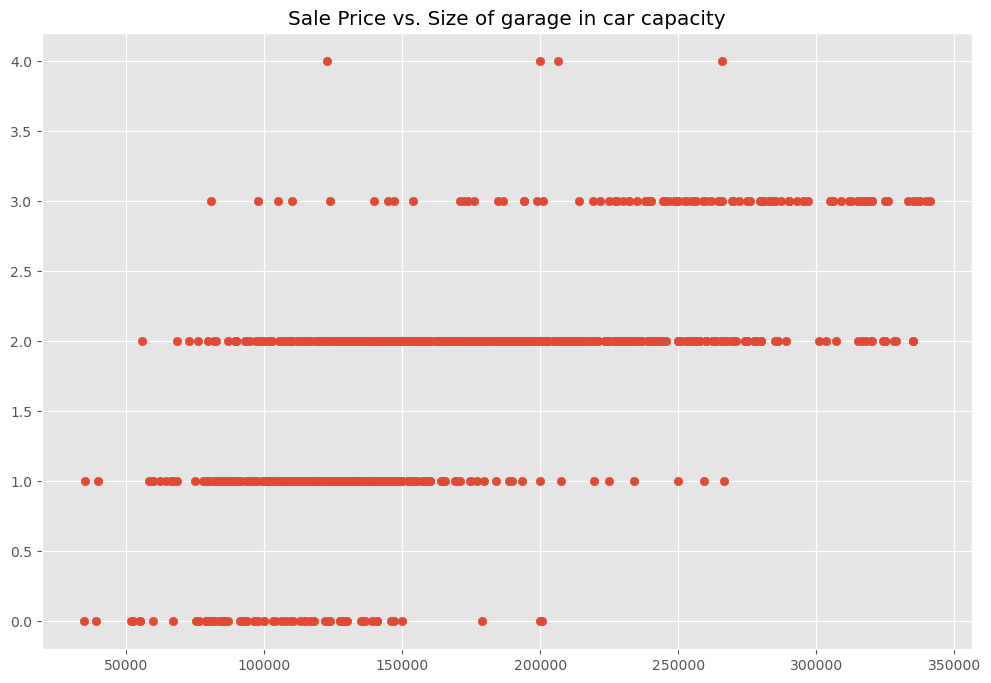

In [229]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['GarageCars'])
plt.title('Sale Price vs. Size of garage in car capacity')

Text(0.5, 1.0, 'Sale Price vs. Wood deck area in square feet')

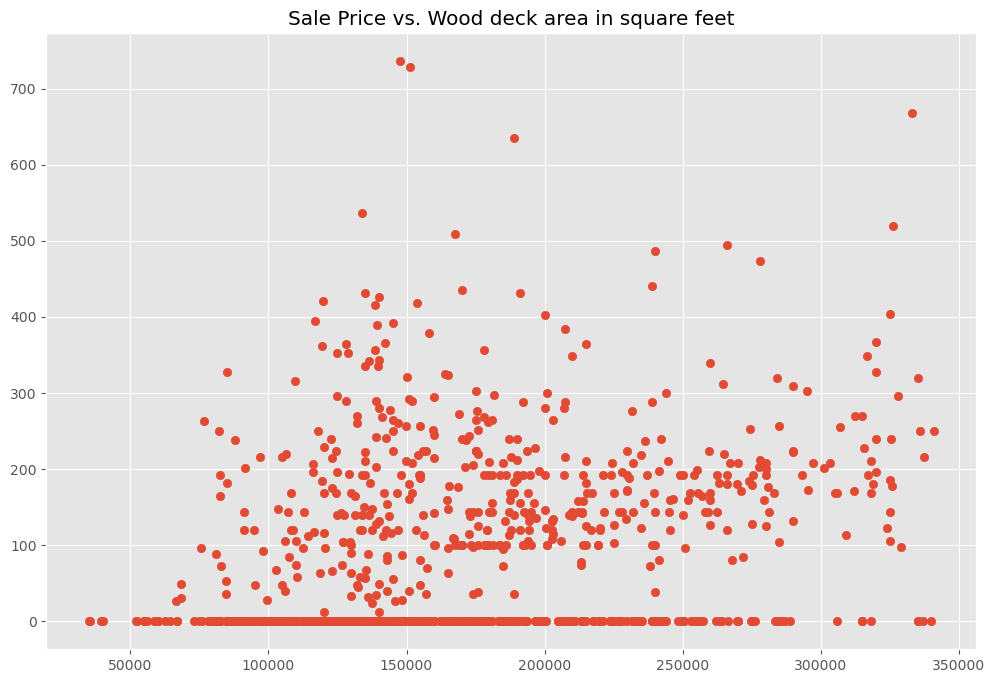

In [230]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['WoodDeckSF'])
plt.title('Sale Price vs. Wood deck area in square feet')

Text(0.5, 1.0, 'Sale Price vs. Open porch area in square feet')

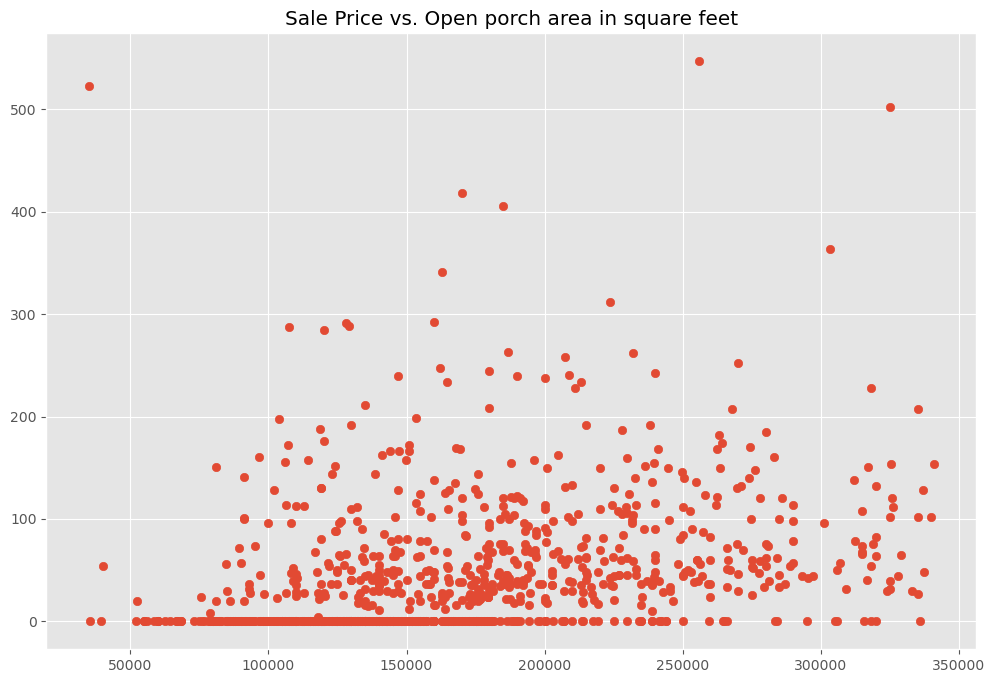

In [231]:
plt.scatter(numeric_handeled_outliers['SalePrice'],numeric_handeled_outliers['OpenPorchSF'])
plt.title('Sale Price vs. Open porch area in square feet')

Feature Selection
based on the EDA (Exploratory Data Analysis) above, the following numerical features are selected

- correlation of sale price with selected numerical features

In [232]:
numeric_handeled_outliers.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'LotFrontage_ismissing',
       'MasVnrArea_ismissing', 'num_missing'],
      dtype='object')

In [233]:
corr_numerical_var = numeric_handeled_outliers[['MSSubClass','LotFrontage','LotArea', 'OverallQual' ,'OverallCond',
 'YearBuilt',  
'TotalBsmtSF', '1stFlrSF' ,'2ndFlrSF',
 'GrLivArea' ,'BsmtFullBath','FullBath', 'HalfBath',
 'BedroomAbvGr','TotRmsAbvGrd',  'Fireplaces', 
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',  'MoSold', 'YrSold',
 'SalePrice' ]].copy()
 

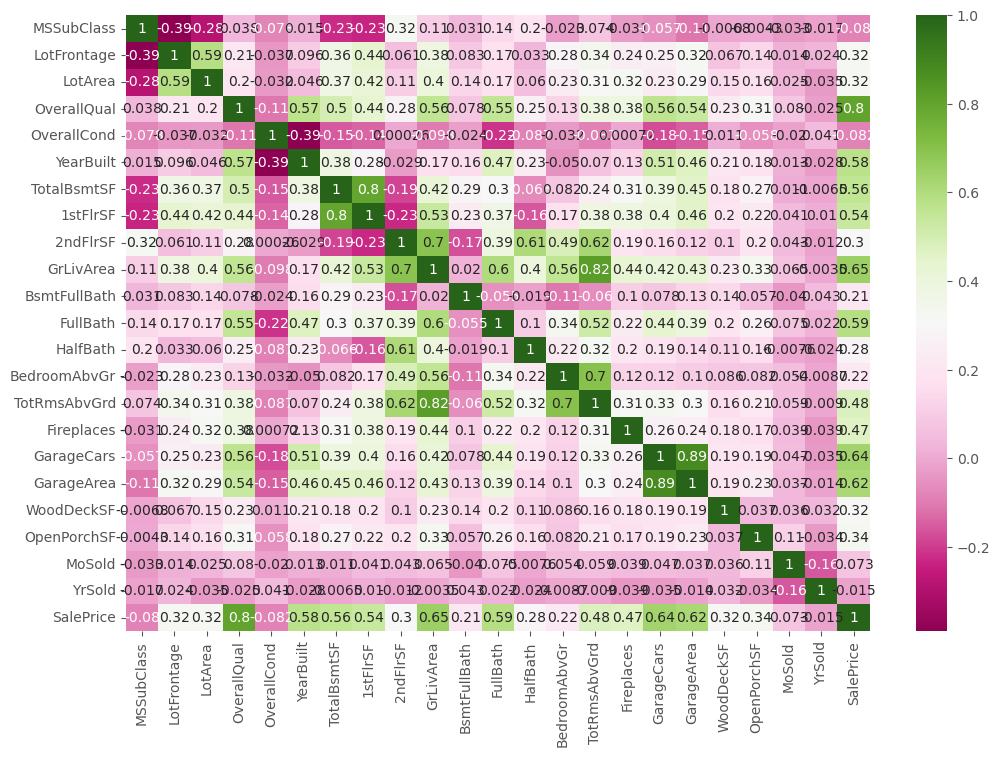

In [234]:
dataplot = sns.heatmap(corr_numerical_var.corr(), cmap="PiYG", annot=True)

In [235]:
numerical_features = corr_numerical_var[[ 'OverallQual' ,
 'YearBuilt',  
'TotalBsmtSF', '1stFlrSF' ,
 'GrLivArea' ,'FullBath', 'TotRmsAbvGrd',  'Fireplaces', 
 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
 'SalePrice']].copy()
 

In [236]:
#sns.pairplot(df_numerical_features)

- Non-numerical

Detecting outliers in the categorical data is something about the comparison between the percentage of availability of data for all the categories. 

In [237]:
df_non_numeric.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'Electrical_ismissing', 'num_missing'],
      dtype='object')

- ordinal encoding - label encoding

In [238]:
from sklearn.preprocessing import OrdinalEncoder

In [239]:
df_non_numeric['GarageCond'].unique()

array(['TA', 'Fa', 'None', 'Gd', 'Po', 'Ex'], dtype=object)

In [240]:
ordinal1 = ['Ex','Gd','TA','Fa','Po','None']
ordinal_land = ['Gtl','Mod','Sev']
ordinal_bsmt = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','None']



In [241]:
enc = OrdinalEncoder(categories=[ordinal1])
enc_land = OrdinalEncoder(categories=[ordinal_land])
enc_bsmt = OrdinalEncoder(categories=[ordinal_bsmt])
df_non_numeric['ExterQual'] = enc.fit_transform(df_non_numeric[['ExterQual']])
df_non_numeric['ExterCond']= enc.fit_transform(df_non_numeric[['ExterCond']]) 
df_non_numeric['BsmtQual']  = enc.fit_transform(df_non_numeric[['BsmtQual']])
df_non_numeric['BsmtCond']= enc.fit_transform(df_non_numeric[['BsmtCond']])
df_non_numeric['HeatingQC']= enc.fit_transform(df_non_numeric[['HeatingQC']])
df_non_numeric['KitchenQual']= enc.fit_transform(df_non_numeric[['KitchenQual']])
df_non_numeric['FireplaceQu']= enc.fit_transform(df_non_numeric[['FireplaceQu']])
df_non_numeric['GarageQual']= enc.fit_transform(df_non_numeric[['GarageQual']])
df_non_numeric['GarageCond']= enc.fit_transform(df_non_numeric[['GarageCond']])
df_non_numeric['LandSlope']= enc_land.fit_transform(df_non_numeric[['LandSlope']])
df_non_numeric['BsmtFinType1']= enc_bsmt.fit_transform(df_non_numeric[['BsmtFinType1']])
df_non_numeric['BsmtFinType2']= enc_bsmt.fit_transform(df_non_numeric[['BsmtFinType2']])




In [242]:
df_non_numeric['ExterCond'].head()

0    2.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: ExterCond, dtype: float64

In [243]:
df_ordinal = df_non_numeric[['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','LandSlope','BsmtFinType1','BsmtFinType2']].copy()

Nominal encoding: one hot encoding

In [244]:
df_categorial = df_non_numeric[['MSZoning','Street','Utilities','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Functional','GarageType','PavedDrive','Fence','SaleType','SaleCondition']].copy()

In [245]:
from sklearn.preprocessing import OneHotEncoder

In [246]:

ohe = OneHotEncoder(sparse=False)
hot_econded = pd.DataFrame(ohe.fit_transform(df_categorial[['MSZoning','Street','Utilities','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','Foundation','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Functional','GarageType','PavedDrive','Fence','SaleType','SaleCondition']]))

In [247]:
hot_econded.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0

In [248]:
ohe.get_feature_names_out()

array(['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst',
       'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr',
       'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Con

In [249]:
final_df = numerical_features.join(df_ordinal)


In [250]:
final_df= final_df.join(hot_econded)

<AxesSubplot:xlabel='SalePrice', ylabel='Neighborhood'>

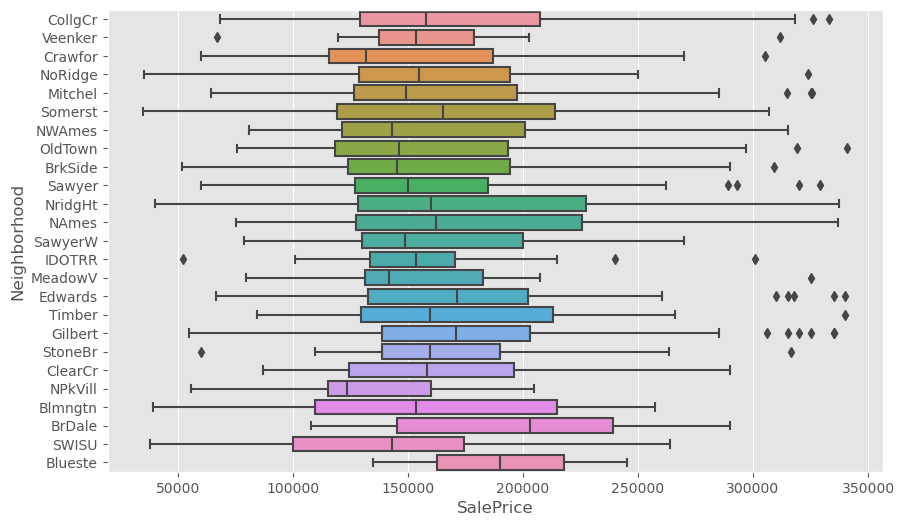

In [251]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df_numeric['SalePrice'], y=df_non_numeric['Neighborhood'])

<AxesSubplot:>

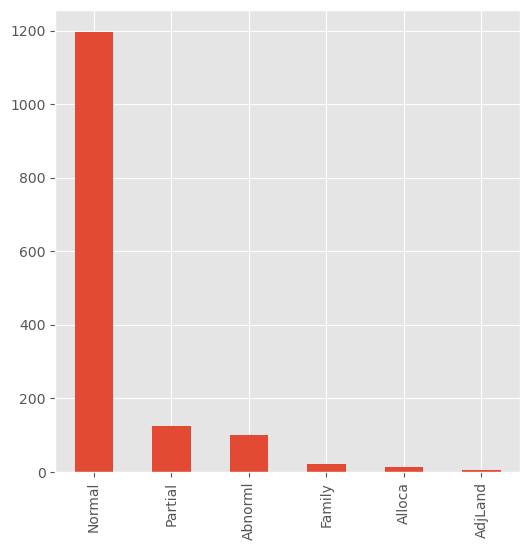

In [252]:
df_non_numeric['SaleCondition'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

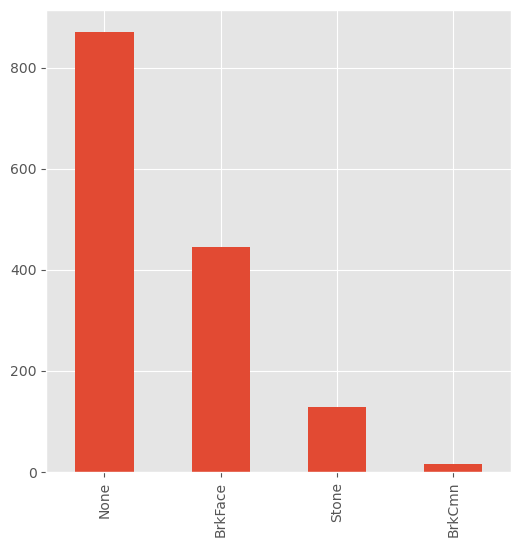

In [253]:
df_non_numeric['MasVnrType'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

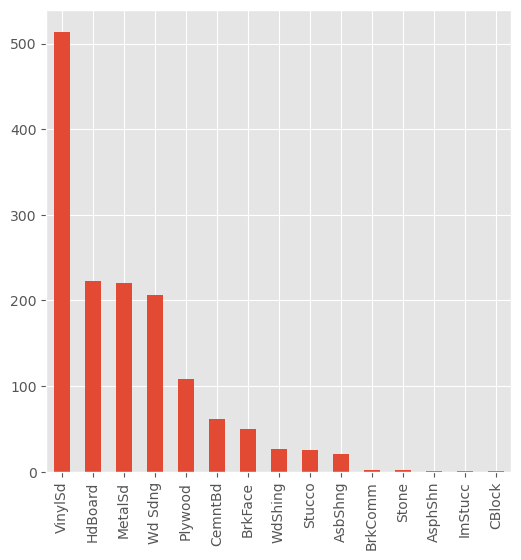

In [254]:
df_non_numeric['Exterior1st'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

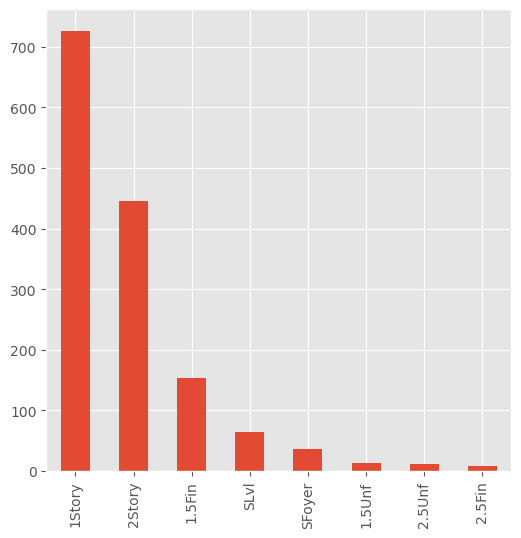

In [255]:
df_non_numeric['HouseStyle'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

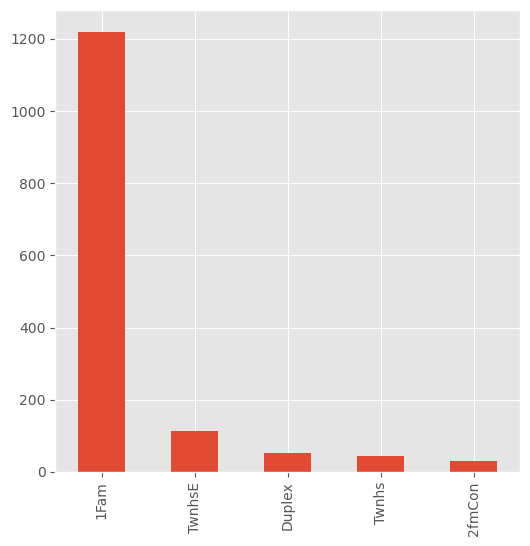

In [256]:
df_non_numeric['BldgType'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

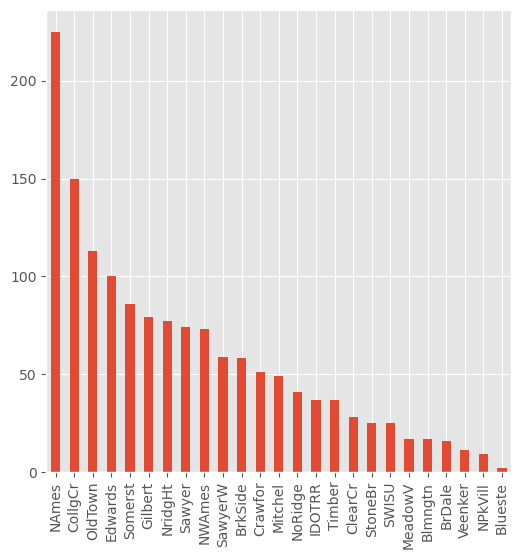

In [257]:
df_non_numeric['Neighborhood'].value_counts().plot(kind='bar',figsize=(6,6))

<AxesSubplot:>

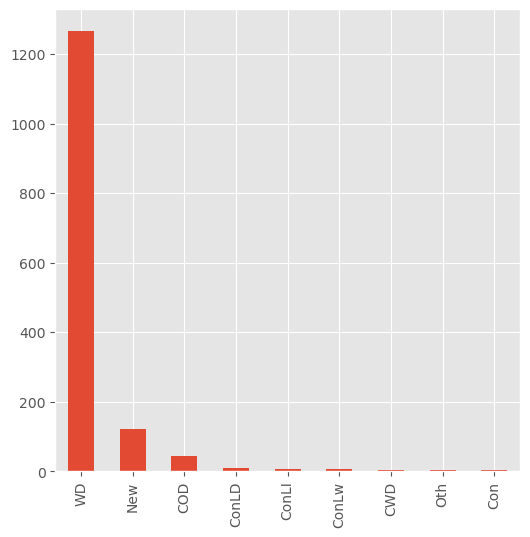

In [258]:
df_non_numeric['SaleType'].value_counts().plot(kind='bar',figsize=(6,6))


- SalePrice: target variable

Separate target & features


In [259]:
X = final_df.drop('SalePrice',axis=1)
y=final_df['SalePrice']

In [260]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

In [261]:
# split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [262]:
# MODELING

# 1. OLS

ols = LinearRegression()
ols.fit(X_train, y_train)
ols_yhat = ols.predict(X_test)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [265]:
print('Variance Score of OLS model is {}'.format(evs(y_test, ols_yhat)))

Variance Score of OLS model is 0.7440306444475452
